In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import RFE

In [2]:
df = pd.read_excel('Sports Data.xlsx', 'Sports data for DSBA')

In [3]:
df.head()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,Loss,24.0,Day and Night,T20,3.0,1,2.0,Bowling,Zimbabwe,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,Win,24.0,NaN,ODI,2.0,1,2.0,Bowling,Kenya,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [4]:
df.tail()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
2925,Game_2926,Win,30.0,Day,T20,3.0,1,4.0,Batting,South Africa,...,15.0,3,8.0,0,3.0,6.0,3,50.0,3,2
2926,Game_2927,Win,30.0,Day,ODI,4.0,1,3.0,Bowling,Kenya,...,14.0,4,8.0,2,3.0,6.0,2,52.0,2,1
2927,Game_2928,Win,30.0,Day and Night,ODI,4.0,1,3.0,Bowling,Pakistan,...,14.0,4,10.0,2,4.0,10.0,2,80.0,3,2
2928,Game_2929,Win,30.0,Day,ODI,4.0,1,3.0,Batting,Kenya,...,14.0,2,20.0,2,3.0,6.0,3,98.0,3,1
2929,Game_2930,Win,30.0,Day,ODI,4.0,1,3.0,Batting,Kenya,...,12.0,4,4.0,5,3.0,6.0,3,62.0,1,1


In [5]:
df.shape
print('There are', df.shape[0],'rows and', df.shape[1],'columns.')

There are 2930 rows and 23 columns.


In [6]:
df.dtypes

Game_number                object
Result                     object
Avg_team_Age              float64
Match_light_type           object
Match_format               object
Bowlers_in_team           float64
Wicket_keeper_in_team       int64
All_rounder_in_team       float64
First_selection            object
Opponent                   object
Season                     object
Audience_number           float64
Offshore                   object
Max_run_scored_1over      float64
Max_wicket_taken_1over      int64
Extra_bowls_bowled        float64
Min_run_given_1over         int64
Min_run_scored_1over      float64
Max_run_given_1over       float64
extra_bowls_opponent        int64
player_highest_run        float64
Players_scored_zero        object
player_highest_wicket      object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

**Duplicates**

In [8]:
dups=df.duplicated().sum()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


**Null values**

In [9]:
df.isnull().sum()

Game_number                0
Result                     0
Avg_team_Age              97
Match_light_type          52
Match_format              70
Bowlers_in_team           82
Wicket_keeper_in_team      0
All_rounder_in_team       40
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [10]:
df.isnull().sum()[df.isnull().sum()>0] 

Avg_team_Age            97
Match_light_type        52
Match_format            70
Bowlers_in_team         82
All_rounder_in_team     40
First_selection         59
Opponent                36
Season                  62
Audience_number         81
Offshore                64
Max_run_scored_1over    28
Extra_bowls_bowled      29
Min_run_scored_1over    27
Max_run_given_1over     34
player_highest_run      28
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_team_Age,2833.0,29.242852,2.264230,12.0,30.0,30.0,30.00,70.0
Bowlers_in_team,2848.0,2.913624,1.023907,1.0,2.0,3.0,4.00,5.0
Wicket_keeper_in_team,2930.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
All_rounder_in_team,2890.0,2.722491,1.092699,1.0,2.0,3.0,4.00,4.0
Audience_number,2849.0,46267.960688,48599.581459,7063.0,20363.0,34349.0,57876.00,1399930.0
Max_run_scored_1over,2902.0,15.199862,3.661010,11.0,12.0,14.0,18.00,25.0
Max_wicket_taken_1over,2930.0,2.713993,1.080623,1.0,2.0,3.0,4.00,4.0
Extra_bowls_bowled,2901.0,11.252671,7.780829,0.0,6.0,10.0,15.00,40.0
Min_run_given_1over,2930.0,1.952560,1.678332,0.0,0.0,2.0,3.00,6.0
Min_run_scored_1over,2903.0,2.762659,0.705759,1.0,2.0,3.0,3.00,4.0


In [12]:
df.describe(include='object').T

,count,unique,top,freq
Game_number,2930,2930,Game_1,1
Result,2930,2,Win,2457
Match_light_type,2878,3,Day,2041
Match_format,2860,4,ODI,1865
First_selection,2871,3,Bowling,1722
Opponent,2894,9,South Africa,640
Season,2868,3,Rainy,1309
Offshore,2866,2,No,2057
Players_scored_zero,2930,5,3,1730
player_highest_wicket,2930,6,1,1084


In [13]:
df.columns

Index(['Game_number', 'Result', 'Avg_team_Age', 'Match_light_type',
       'Match_format', 'Bowlers_in_team', 'Wicket_keeper_in_team',
       'All_rounder_in_team', 'First_selection', 'Opponent', 'Season',
       'Audience_number', 'Offshore', 'Max_run_scored_1over',
       'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over',
       'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent',
       'player_highest_run', 'Players_scored_zero', 'player_highest_wicket'],
      dtype='object')

**Dropping unrequired columns**

In [14]:
df_n = df.copy()

In [15]:
df_n = df_n.drop(['Game_number', 'Avg_team_Age', 'Wicket_keeper_in_team'], axis = 1)

In [16]:
df_n.shape

(2930, 20)

**Treating null values**

In [17]:
df_n.isnull().sum()

Result                     0
Match_light_type          52
Match_format              70
Bowlers_in_team           82
All_rounder_in_team       40
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [18]:
df_n.dropna()

,Result,Match_light_type,Match_format,Bowlers_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,Offshore,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Loss,Day,ODI,3.0,3.0,Bowling,Srilanka,Summer,9940.0,No,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Win,Day,T20,3.0,4.0,Batting,Zimbabwe,Summer,8400.0,No,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
4,Loss,Night,ODI,1.0,3.0,Bowling,Srilanka,Summer,13328.0,No,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1
5,Win,Night,ODI,3.0,4.0,Batting,Srilanka,Summer,11277.0,No,15.0,3,0.0,5,4.0,6.0,0,97.0,3,1
6,Loss,Day and Night,T20,2.0,2.0,Batting,Zimbabwe,Summer,10983.0,Yes,12.0,3,0.0,0,4.0,6.0,0,70.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Win,Day,T20,3.0,4.0,Batting,South Africa,Summer,33950.0,No,15.0,3,8.0,0,3.0,6.0,3,50.0,3,2
2926,Win,Day,ODI,4.0,3.0,Bowling,Kenya,Summer,19663.0,No,14.0,4,8.0,2,3.0,6.0,2,52.0,2,1
2927,Win,Day and Night,ODI,4.0,3.0,Bowling,Pakistan,Rainy,39823.0,Yes,14.0,4,10.0,2,4.0,10.0,2,80.0,3,2
2928,Win,Day,ODI,4.0,3.0,Batting,Kenya,Rainy,14007.0,No,14.0,2,20.0,2,3.0,6.0,3,98.0,3,1


In [19]:
# Imputing null values

median_1 = df_n['Min_run_scored_1over'].median()
median_2 = df_n['Max_run_scored_1over'].median()
median_3 = df_n['player_highest_run'].median()
median_4 = df_n['Extra_bowls_bowled'].median()
median_5 = df_n['Max_run_given_1over'].median()


df_n["Min_run_scored_1over"]=df_n["Min_run_scored_1over"].replace(np.nan,median_1)
df_n["Max_run_scored_1over"]=df_n["Max_run_scored_1over"].replace(np.nan,median_2)
df_n["player_highest_run"]=df_n["player_highest_run"].replace(np.nan,median_3)
df_n["Extra_bowls_bowled"]=df_n["Extra_bowls_bowled"].replace(np.nan,median_4)
df_n["Max_run_given_1over"]=df_n["Max_run_given_1over"].replace(np.nan,median_5)

In [20]:
mode_1 = df_n['Opponent'].mode().values[0]
mode_2 = df_n['Match_light_type'].mode().values[0]

df_n["Opponent"]=df_n["Opponent"].replace(np.nan,mode_1)
df_n["Match_light_type"]=df_n["Match_light_type"].replace(np.nan,mode_2)

In [21]:
df_n.dropna(inplace = True)
df_n.reset_index(drop=True, inplace=True)

In [22]:
df_n.shape

(2473, 20)

In [23]:
df_n.isnull().sum()

Result                    0
Match_light_type          0
Match_format              0
Bowlers_in_team           0
All_rounder_in_team       0
First_selection           0
Opponent                  0
Season                    0
Audience_number           0
Offshore                  0
Max_run_scored_1over      0
Max_wicket_taken_1over    0
Extra_bowls_bowled        0
Min_run_given_1over       0
Min_run_scored_1over      0
Max_run_given_1over       0
extra_bowls_opponent      0
player_highest_run        0
Players_scored_zero       0
player_highest_wicket     0
dtype: int64

**Converting variables to categorical**

In [24]:
df_n['Match_light_type'] = pd.Categorical(df_n.Match_light_type)
df_n['Match_format'] = pd.Categorical(df_n.Match_format)
df_n['Bowlers_in_team'] = pd.Categorical(df_n.Bowlers_in_team)
df_n['All_rounder_in_team'] = pd.Categorical(df_n.All_rounder_in_team)
df_n['First_selection'] = pd.Categorical(df_n.First_selection)
df_n['Opponent'] = pd.Categorical(df_n.Opponent)
df_n['Season'] = pd.Categorical(df_n.Season)
df_n['Offshore'] = pd.Categorical(df_n.Offshore)
df_n['Max_run_scored_1over'] = pd.Categorical(df_n.Max_run_scored_1over)
df_n['Max_wicket_taken_1over'] = pd.Categorical(df_n.Max_wicket_taken_1over)
df_n['Min_run_given_1over'] = pd.Categorical(df_n.Min_run_given_1over)
df_n['Min_run_scored_1over'] = pd.Categorical(df_n.Min_run_scored_1over)
df_n['Players_scored_zero'] = pd.Categorical(df_n.Players_scored_zero)
df_n['player_highest_wicket'] = pd.Categorical(df_n.player_highest_wicket)

In [25]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Result                  2473 non-null   object  
 1   Match_light_type        2473 non-null   category
 2   Match_format            2473 non-null   category
 3   Bowlers_in_team         2473 non-null   category
 4   All_rounder_in_team     2473 non-null   category
 5   First_selection         2473 non-null   category
 6   Opponent                2473 non-null   category
 7   Season                  2473 non-null   category
 8   Audience_number         2473 non-null   float64 
 9   Offshore                2473 non-null   category
 10  Max_run_scored_1over    2473 non-null   category
 11  Max_wicket_taken_1over  2473 non-null   category
 12  Extra_bowls_bowled      2473 non-null   float64 
 13  Min_run_given_1over     2473 non-null   category
 14  Min_run_scored_1over    

In [26]:
# unique values of categorical variables
for column in df_n.columns:
    if df_n[column].dtype == 'category':
        print(column.upper(),': ',df_n[column].nunique())
        print(df_n[column].value_counts().sort_values())
        print('\n')

MATCH_LIGHT_TYPE :  3
Night             247
Day and Night     465
Day              1761
Name: Match_light_type, dtype: int64


MATCH_FORMAT :  4
20-20       5
Test      105
T20       746
ODI      1617
Name: Match_format, dtype: int64


BOWLERS_IN_TEAM :  5
5.0     84
1.0    296
2.0    464
4.0    660
3.0    969
Name: Bowlers_in_team, dtype: int64


ALL_ROUNDER_IN_TEAM :  4
1.0    464
2.0    484
4.0    757
3.0    768
Name: All_rounder_in_team, dtype: int64


FIRST_SELECTION :  3
Bat           8
Batting     974
Bowling    1491
Name: First_selection, dtype: int64


OPPONENT :  9
Australia        87
West Indies     136
Zimbabwe        139
Bangladesh      164
Pakistan        215
England         231
Srilanka        454
Kenya           473
South Africa    574
Name: Opponent, dtype: int64


SEASON :  3
Winter     552
Summer     791
Rainy     1130
Name: Season, dtype: int64


OFFSHORE :  2
Yes     702
No     1771
Name: Offshore, dtype: int64


MAX_RUN_SCORED_1OVER :  15
25.0     33
24.0     35
2

**Replacing incorrect inputs**

In [27]:
df_n.Match_format.replace(to_replace='20-20',value='T20',inplace=True)

In [28]:
df_n.First_selection.replace(to_replace='Bat',value='Batting',inplace=True)

In [29]:
df_n.Players_scored_zero.replace(to_replace='Three',value=3,inplace=True)

In [30]:
df_n.player_highest_wicket.replace(to_replace='Three',value=3,inplace=True)

In [31]:
# unique values after replacing values
for column in df_n.columns:
    if df_n[column].dtype == 'category':
        print(column.upper(),': ',df_n[column].nunique())
        print(df_n[column].value_counts().sort_values())
        print('\n')

MATCH_LIGHT_TYPE :  3
Night             247
Day and Night     465
Day              1761
Name: Match_light_type, dtype: int64


MATCH_FORMAT :  3
Test     105
T20      751
ODI     1617
Name: Match_format, dtype: int64


BOWLERS_IN_TEAM :  5
5.0     84
1.0    296
2.0    464
4.0    660
3.0    969
Name: Bowlers_in_team, dtype: int64


ALL_ROUNDER_IN_TEAM :  4
1.0    464
2.0    484
4.0    757
3.0    768
Name: All_rounder_in_team, dtype: int64


FIRST_SELECTION :  2
Batting     982
Bowling    1491
Name: First_selection, dtype: int64


OPPONENT :  9
Australia        87
West Indies     136
Zimbabwe        139
Bangladesh      164
Pakistan        215
England         231
Srilanka        454
Kenya           473
South Africa    574
Name: Opponent, dtype: int64


SEASON :  3
Winter     552
Summer     791
Rainy     1130
Name: Season, dtype: int64


OFFSHORE :  2
Yes     702
No     1771
Name: Offshore, dtype: int64


MAX_RUN_SCORED_1OVER :  15
25.0     33
24.0     35
23.0     45
21.0     81
20.0     9

**EDA**

In [32]:
df_n.head(2)

,Result,Match_light_type,Match_format,Bowlers_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,Offshore,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Loss,Day,ODI,3.0,3.0,Bowling,Srilanka,Summer,9940.0,No,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Win,Day,T20,3.0,4.0,Batting,Zimbabwe,Summer,8400.0,No,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1


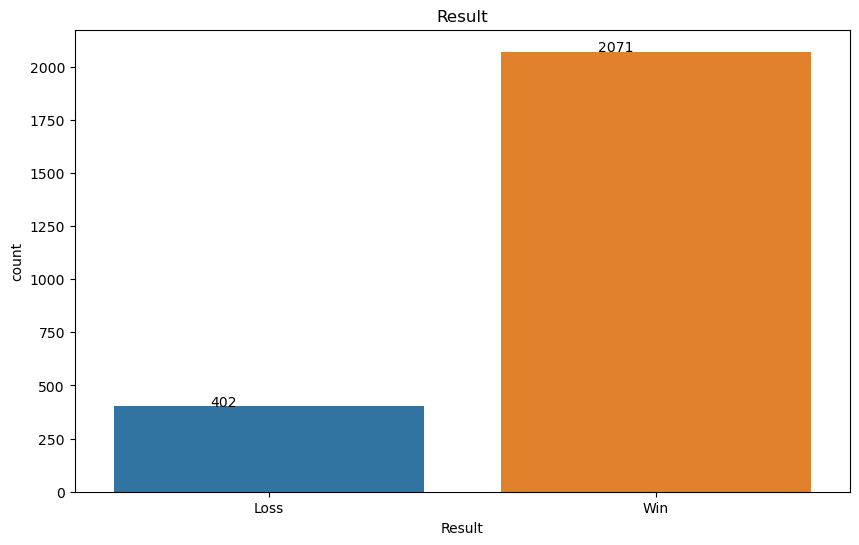

In [33]:
# i) Result

plt.figure(figsize=(10,6))
ax=sns.countplot(df_n, x = 'Result')
plt.title('Result')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

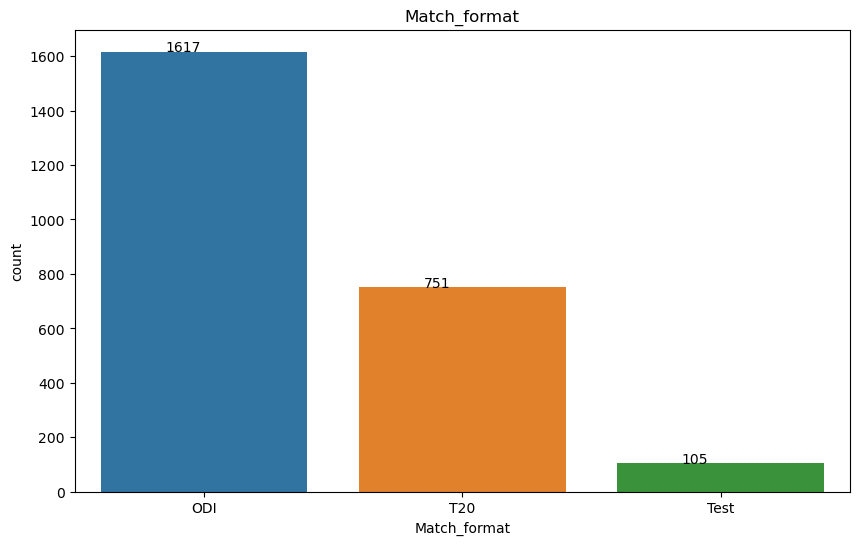

In [34]:
# ii) Match_format

plt.figure(figsize=(10,6))
ax=sns.countplot(df_n, x = 'Match_format')
plt.title('Match_format')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

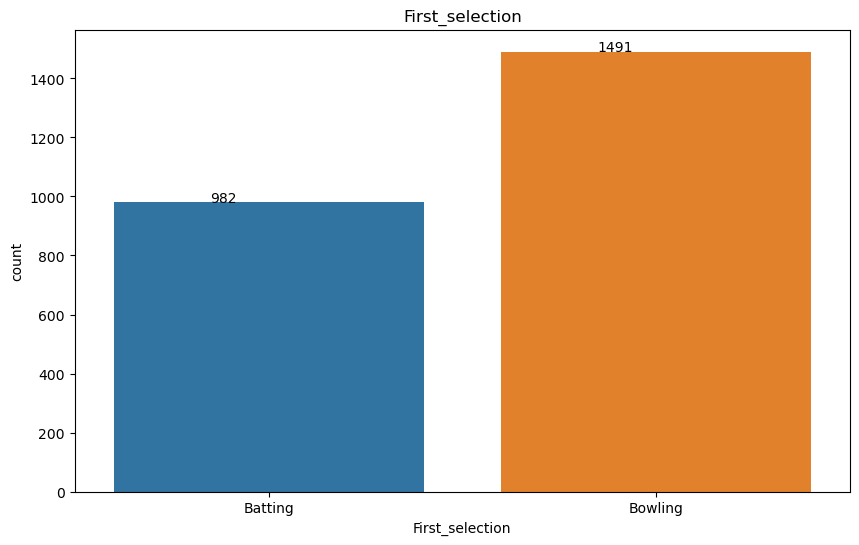

In [35]:
# iii) First_selection

plt.figure(figsize=(10,6))
ax=sns.countplot(df_n, x = 'First_selection')
plt.title('First_selection')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

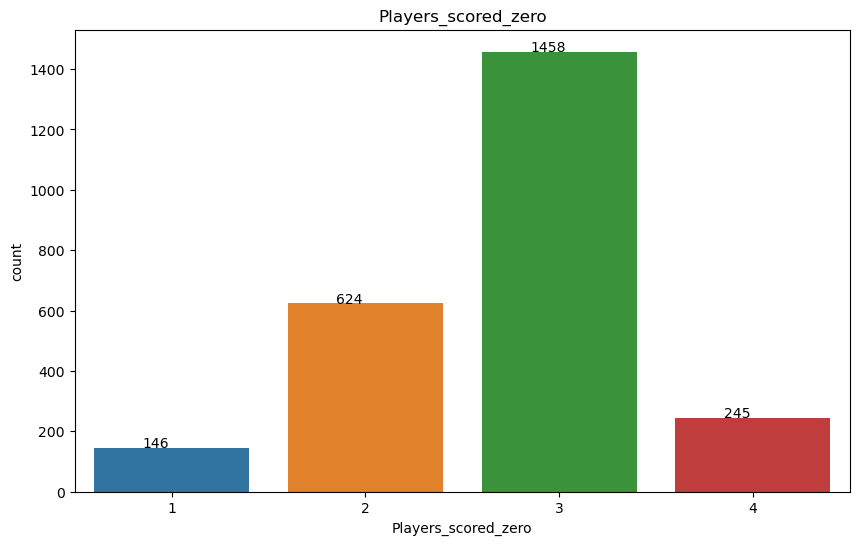

In [36]:
# iv) Players_scored_zero

plt.figure(figsize=(10,6))
ax=sns.countplot(df_n, x = 'Players_scored_zero')
plt.title('Players_scored_zero')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

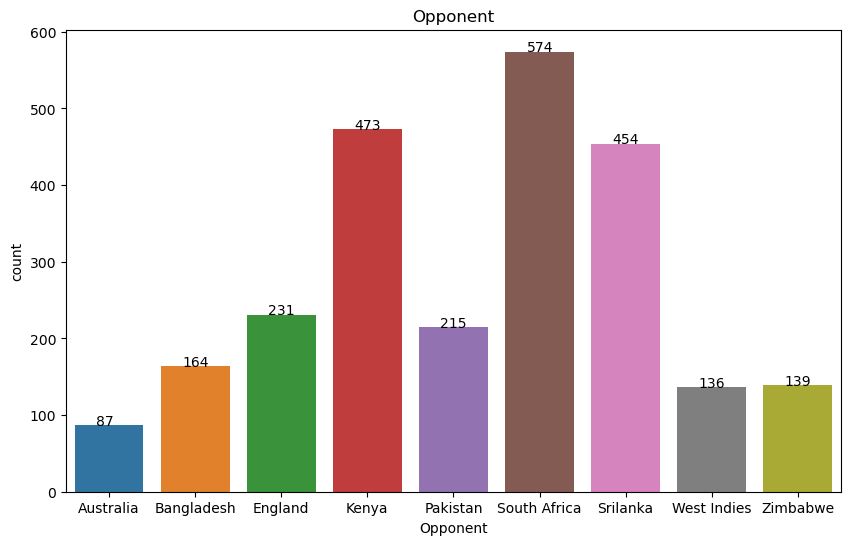

In [37]:
# v) Opponent

plt.figure(figsize=(10,6))
ax=sns.countplot(df_n, x = 'Opponent')
plt.title('Opponent')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

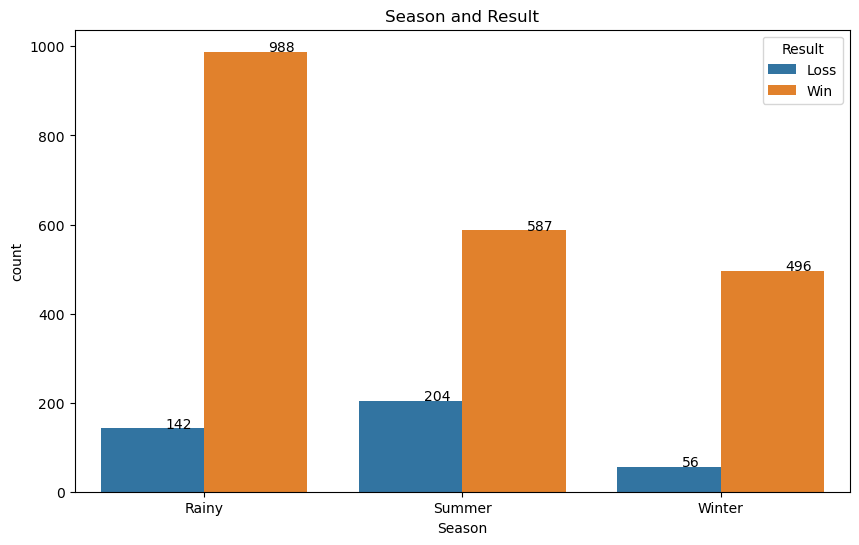

In [38]:
# vi) Season and Result:

plt.figure(figsize=(10,6))
ax=sns.countplot(data=df_n, x='Season', hue='Result') 
plt.title('Season and Result')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

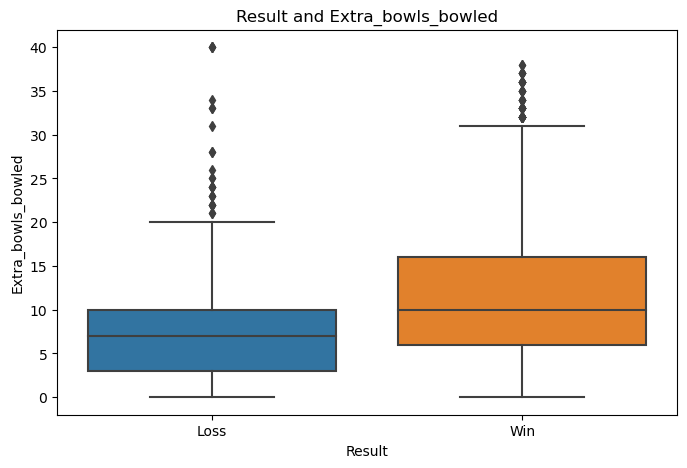

In [39]:
# vii) Result and Extra_bowls_bowled:

plt.figure(figsize=(8,5))
plt.title('Result and Extra_bowls_bowled')
ax=sns.boxplot(data=df_n, x="Result", y='Extra_bowls_bowled');

In [40]:
df_n [df_n['Result']=='Win'] ['Extra_bowls_bowled'].describe()

count    2071.000000
mean       11.812651
std         7.799706
min         0.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        38.000000
Name: Extra_bowls_bowled, dtype: float64

In [41]:
df_n [df_n['Result']=='Loss'] ['Extra_bowls_bowled'].describe()

count    402.000000
mean       8.004975
std        6.930361
min        0.000000
25%        3.000000
50%        7.000000
75%       10.000000
max       40.000000
Name: Extra_bowls_bowled, dtype: float64

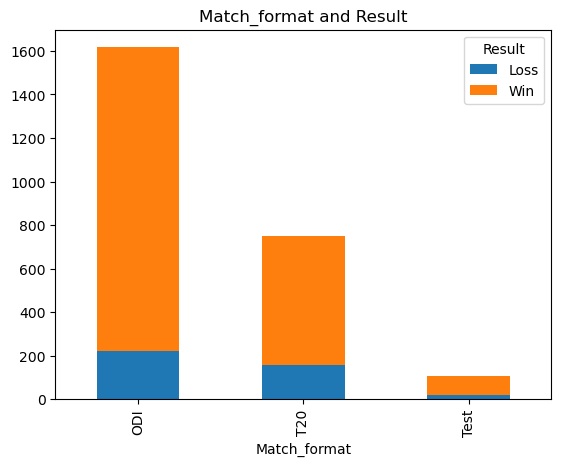

In [42]:
# viii) Match_format and Result:

ct=pd.crosstab(df_n['Match_format'], df_n['Result'])
ct.plot(kind='bar', stacked=True)
plt.title('Match_format and Result');

In [43]:
df_n.groupby('Match_format')[['Result']].value_counts() 

Match_format  Result
ODI           Win       1394
              Loss       223
T20           Win        593
              Loss       158
Test          Win         84
              Loss        21
dtype: int64

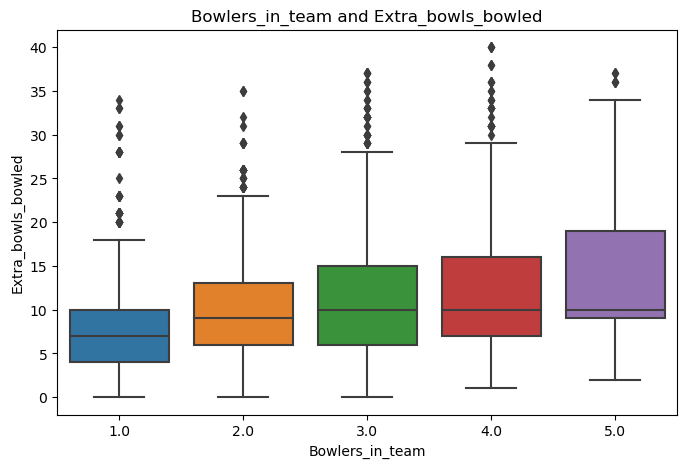

In [44]:
# ix) Bowlers_in_team and Extra_bowls_bowled:

plt.figure(figsize=(8,5))
plt.title('Bowlers_in_team and Extra_bowls_bowled')
ax=sns.boxplot(data=df_n, x="Bowlers_in_team", y='Extra_bowls_bowled');

In [45]:
df_n [df_n['Bowlers_in_team']==1] ['Extra_bowls_bowled'].describe()

count    296.000000
mean       8.736486
std        7.260631
min        0.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       34.000000
Name: Extra_bowls_bowled, dtype: float64

In [46]:
df_n [df_n['Bowlers_in_team']==5] ['Extra_bowls_bowled'].describe()

count    84.000000
mean     14.261905
std       8.945779
min       2.000000
25%       9.000000
50%      10.000000
75%      19.000000
max      37.000000
Name: Extra_bowls_bowled, dtype: float64

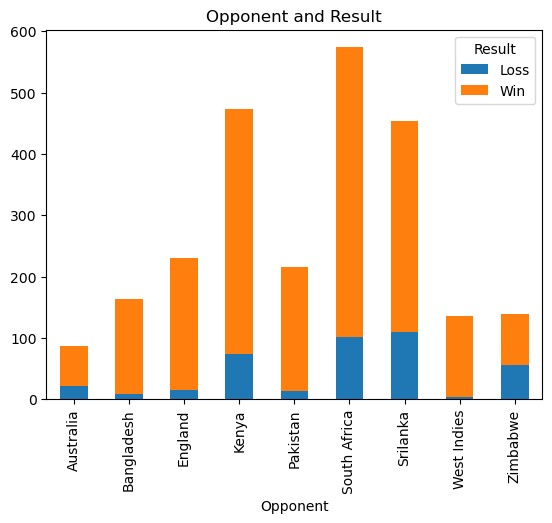

In [47]:
# x) Opponent and Result:

ct=pd.crosstab(df_n['Opponent'], df_n['Result'])
ct.plot(kind='bar', stacked=True)
plt.title('Opponent and Result');

In [48]:
df_n.groupby('Opponent')[['Result']].value_counts(ascending=False)

Opponent      Result
Australia     Win        66
              Loss       21
Bangladesh    Win       156
              Loss        8
England       Win       216
              Loss       15
Kenya         Win       399
              Loss       74
Pakistan      Win       202
              Loss       13
South Africa  Win       472
              Loss      102
Srilanka      Win       344
              Loss      110
West Indies   Win       133
              Loss        3
Zimbabwe      Win        83
              Loss       56
dtype: int64

<Figure size 1500x700 with 0 Axes>

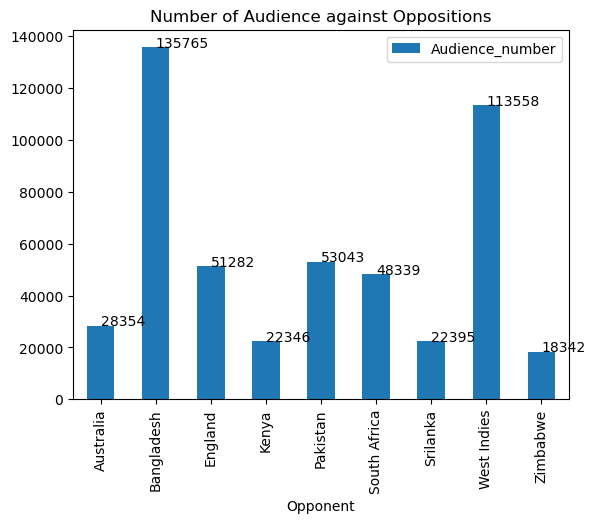

In [49]:
# xi) Opponent and Audience_number:

plt.figure(figsize=(15,7))
opponents_run_scored = pd.DataFrame(df_n.groupby('Opponent')['Audience_number'].mean())
ax=opponents_run_scored.plot(kind='bar', title= 'Number of Audience against Oppositions')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

<Figure size 2000x2000 with 0 Axes>

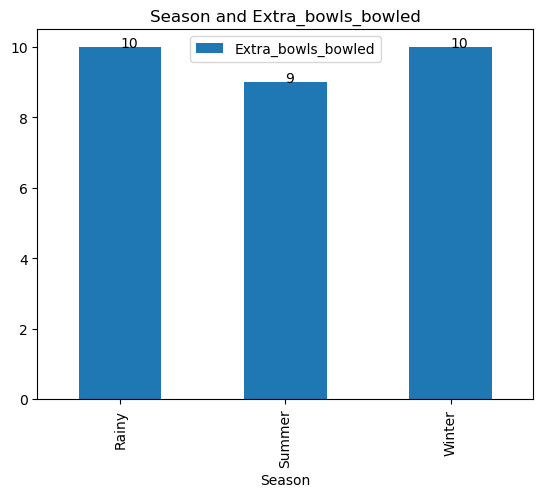

In [50]:
# xii) Season and Extra_bowls_bowled:

plt.figure(figsize=(20,20))
season_extra_bowls_bowled = pd.DataFrame(df_n.groupby('Season')['Extra_bowls_bowled'].median())
ax=season_extra_bowls_bowled.plot(kind='bar', title= 'Season and Extra_bowls_bowled')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

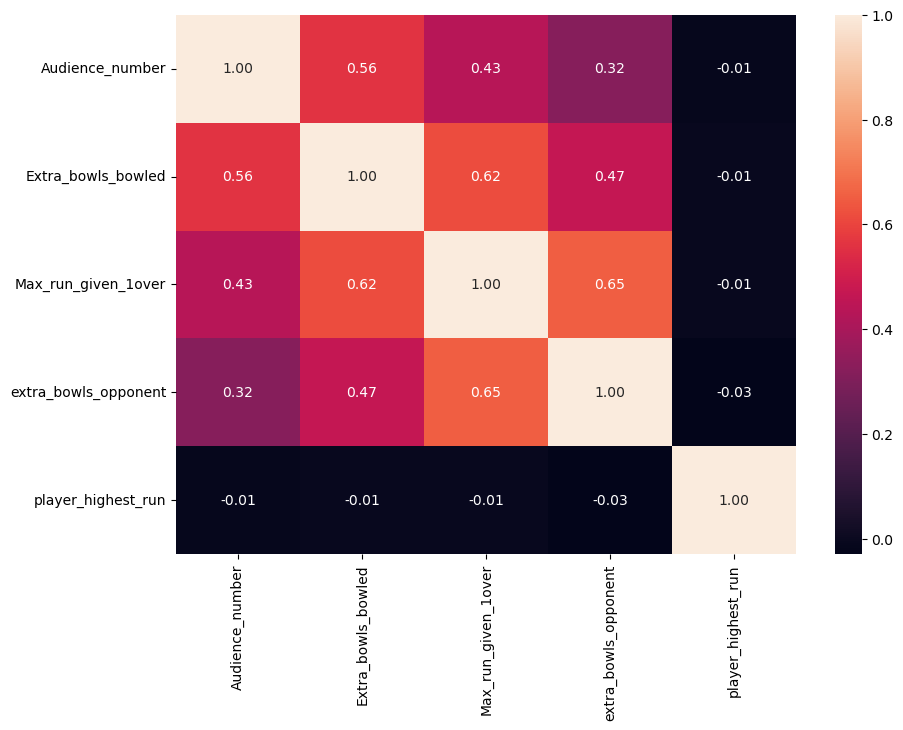

In [51]:
# xiii) Correlation
plt.figure(figsize = (10,7))
sns.heatmap(df_n.corr(), annot=True,fmt='.2f');

In [52]:
# for model purpose
df_new = df_n.copy()

**Outlier treatment**

In [53]:
df_n_num= df_n.select_dtypes(include=['float64','int64'])
df_n_num.columns

Index(['Audience_number', 'Extra_bowls_bowled', 'Max_run_given_1over',
       'extra_bowls_opponent', 'player_highest_run'],
      dtype='object')

In [54]:
df_n_cat= df_n.select_dtypes(include=['category','object'])
df_n_cat.columns

Index(['Result', 'Match_light_type', 'Match_format', 'Bowlers_in_team',
       'All_rounder_in_team', 'First_selection', 'Opponent', 'Season',
       'Offshore', 'Max_run_scored_1over', 'Max_wicket_taken_1over',
       'Min_run_given_1over', 'Min_run_scored_1over', 'Players_scored_zero',
       'player_highest_wicket'],
      dtype='object')

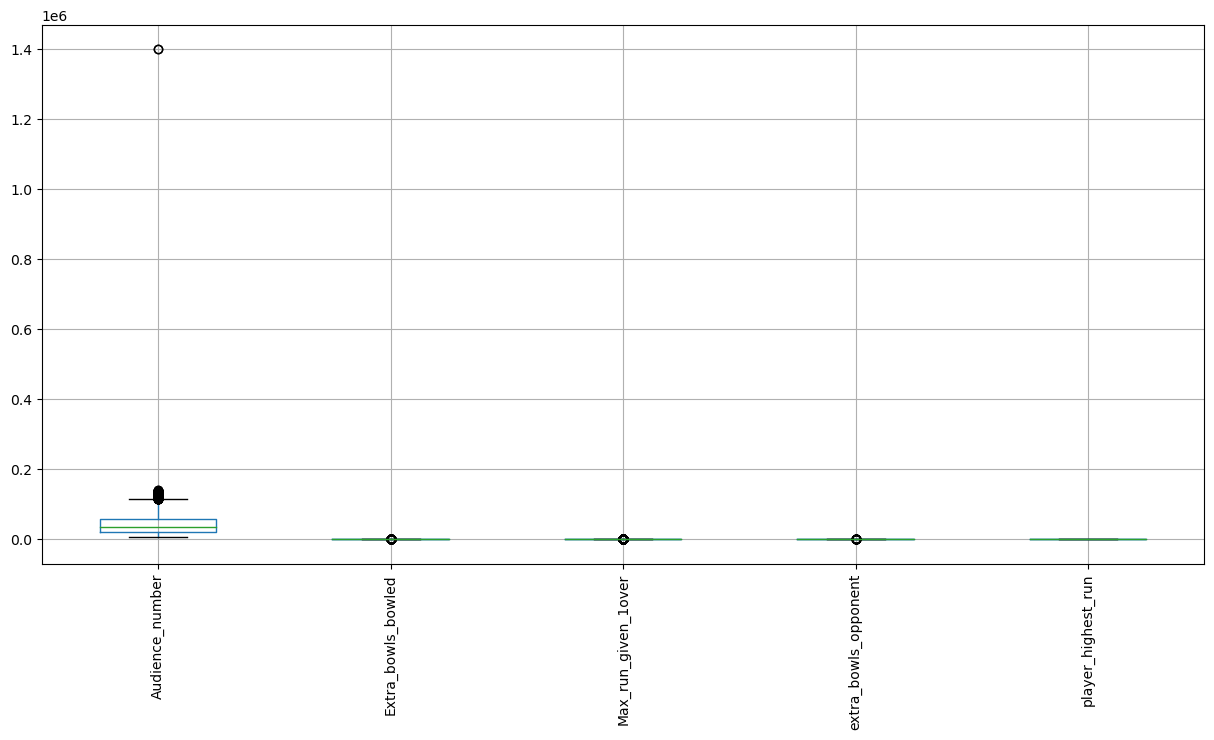

In [55]:
df_n_num.boxplot(figsize=(15,7))
plt.xticks(rotation=90)
plt.show()

In [56]:
# Treating outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [57]:
for column in df_n_num.columns:
    lr,ur=remove_outlier(df_n_num[column])
    df_n_num[column]=np.where(df_n_num[column]>ur,ur,df_n_num[column])
    df_n_num[column]=np.where(df_n_num[column]<lr,lr,df_n_num[column])

In [58]:
df_n_ot = pd.concat([df_n_cat, df_n_num], axis = 1)
df_n_ot.reset_index(drop=True, inplace=True)

In [59]:
df_n_ot

,Result,Match_light_type,Match_format,Bowlers_in_team,All_rounder_in_team,First_selection,Opponent,Season,Offshore,Max_run_scored_1over,Max_wicket_taken_1over,Min_run_given_1over,Min_run_scored_1over,Players_scored_zero,player_highest_wicket,Audience_number,Extra_bowls_bowled,Max_run_given_1over,extra_bowls_opponent,player_highest_run
0,Loss,Day,ODI,3.0,3.0,Bowling,Srilanka,Summer,No,13.0,3,2,3.0,3,1,9940.0,0.0,6.0,0.0,54.0
1,Win,Day,T20,3.0,4.0,Batting,Zimbabwe,Summer,No,12.0,1,0,3.0,2,1,8400.0,0.0,6.0,0.0,69.0
2,Win,Day,ODI,2.0,2.0,Bowling,Kenya,Summer,No,15.0,4,2,3.0,3,1,7357.0,0.0,6.0,0.0,73.0
3,Loss,Night,ODI,1.0,3.0,Bowling,Srilanka,Summer,No,12.0,4,0,3.0,3,1,13328.0,0.0,6.0,0.0,80.0
4,Win,Night,ODI,3.0,4.0,Batting,Srilanka,Summer,No,15.0,3,5,4.0,3,1,11277.0,0.0,6.0,0.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468,Win,Day,T20,3.0,4.0,Batting,South Africa,Summer,No,15.0,3,0,3.0,3,2,33950.0,8.0,6.0,3.0,50.0
2469,Win,Day,ODI,4.0,3.0,Bowling,Kenya,Summer,No,14.0,4,2,3.0,2,1,19663.0,8.0,6.0,2.0,52.0
2470,Win,Day and Night,ODI,4.0,3.0,Bowling,Pakistan,Rainy,Yes,14.0,4,2,4.0,3,2,39823.0,10.0,10.0,2.0,80.0
2471,Win,Day,ODI,4.0,3.0,Batting,Kenya,Rainy,No,14.0,2,2,3.0,3,1,14007.0,20.0,6.0,3.0,98.0


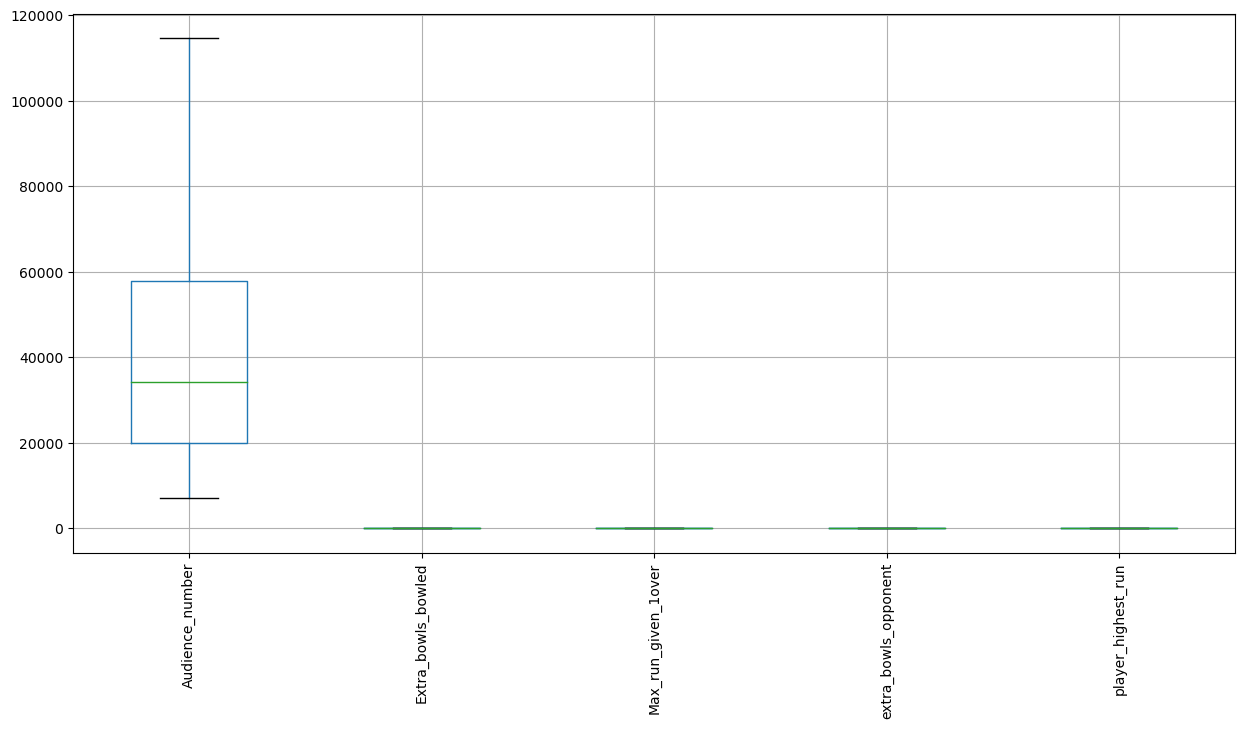

In [60]:
df_n_ot.boxplot(figsize=(15,7))
plt.xticks(rotation=90)
plt.show()

In [61]:
df_n_ot.head(3)

,Result,Match_light_type,Match_format,Bowlers_in_team,All_rounder_in_team,First_selection,Opponent,Season,Offshore,Max_run_scored_1over,Max_wicket_taken_1over,Min_run_given_1over,Min_run_scored_1over,Players_scored_zero,player_highest_wicket,Audience_number,Extra_bowls_bowled,Max_run_given_1over,extra_bowls_opponent,player_highest_run
0,Loss,Day,ODI,3.0,3.0,Bowling,Srilanka,Summer,No,13.0,3,2,3.0,3,1,9940.0,0.0,6.0,0.0,54.0
1,Win,Day,T20,3.0,4.0,Batting,Zimbabwe,Summer,No,12.0,1,0,3.0,2,1,8400.0,0.0,6.0,0.0,69.0
2,Win,Day,ODI,2.0,2.0,Bowling,Kenya,Summer,No,15.0,4,2,3.0,3,1,7357.0,0.0,6.0,0.0,73.0


In [62]:
df_n_ot.shape

(2473, 20)

**Encoding**

In [63]:
df_enc = df_n_ot.copy()

In [64]:
df_enc['Result'] = df_enc['Result'].astype('category')

In [65]:
df_enc['Result']=df_enc['Result'].cat.codes

In [66]:
df_enc.head(3)

,Result,Match_light_type,Match_format,Bowlers_in_team,All_rounder_in_team,First_selection,Opponent,Season,Offshore,Max_run_scored_1over,Max_wicket_taken_1over,Min_run_given_1over,Min_run_scored_1over,Players_scored_zero,player_highest_wicket,Audience_number,Extra_bowls_bowled,Max_run_given_1over,extra_bowls_opponent,player_highest_run
0,0,Day,ODI,3.0,3.0,Bowling,Srilanka,Summer,No,13.0,3,2,3.0,3,1,9940.0,0.0,6.0,0.0,54.0
1,1,Day,T20,3.0,4.0,Batting,Zimbabwe,Summer,No,12.0,1,0,3.0,2,1,8400.0,0.0,6.0,0.0,69.0
2,1,Day,ODI,2.0,2.0,Bowling,Kenya,Summer,No,15.0,4,2,3.0,3,1,7357.0,0.0,6.0,0.0,73.0


In [67]:
df_enc = pd.get_dummies(df_enc, drop_first = True)

In [68]:
df_enc.head(4)

,Result,Audience_number,Extra_bowls_bowled,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Match_light_type_Day and Night,Match_light_type_Night,Match_format_T20,Match_format_Test,...,Min_run_scored_1over_2.0,Min_run_scored_1over_3.0,Min_run_scored_1over_4.0,Players_scored_zero_2,Players_scored_zero_3,Players_scored_zero_4,player_highest_wicket_2,player_highest_wicket_3,player_highest_wicket_4,player_highest_wicket_5
0,0,9940.0,0.0,6.0,0.0,54.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,8400.0,0.0,6.0,0.0,69.0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
2,1,7357.0,0.0,6.0,0.0,73.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,13328.0,0.0,6.0,0.0,80.0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [69]:
df_enc.shape

(2473, 62)

**RFE with Random Forest**

In [70]:
X = df_enc.drop('Result', axis = 1)
y = df_enc['Result']

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [72]:
rfcl = RandomForestClassifier()

In [73]:
selector = RFE(estimator = rfcl, n_features_to_select=15, step=1)

In [74]:
selector = selector.fit(X, y)

In [75]:
selector.n_features_

15

In [76]:
selector.ranking_

array([ 1,  1,  1,  1,  1,  1, 25,  1, 30, 13,  1,  3, 38,  8,  2,  1,  1,
       39, 35, 11, 36, 17,  4, 44, 16,  1, 19,  1, 12, 14, 21, 22, 26, 31,
       28, 34, 41, 43, 24, 40, 37, 47, 15,  5,  1, 33,  7, 18, 23, 32, 45,
        6,  1, 20, 10,  1, 29,  9, 27, 42, 46])

In [77]:
cols=df_enc.drop(['Result'], axis = 1)

In [78]:
rfe = pd.DataFrame({'Feature': cols.columns, 'Rank': selector.ranking_})
rfe[rfe['Rank'] == 1]

,Feature,Rank
0,Audience_number,1
1,Extra_bowls_bowled,1
2,Max_run_given_1over,1
3,extra_bowls_opponent,1
4,player_highest_run,1
5,Match_light_type_Day and Night,1
7,Match_format_T20,1
10,Bowlers_in_team_3.0,1
15,All_rounder_in_team_4.0,1
16,First_selection_Bowling,1


In [79]:
rfe_df = rfe[rfe['Rank'] == 1]

In [80]:
rfe_df.shape

(15, 2)

In [81]:
rfe_df=df_enc.drop(['Result', 'Match_light_type_Night', 'Match_format_Test', 'Bowlers_in_team_2.0', 'Bowlers_in_team_4.0', 
                    'Bowlers_in_team_5.0', 'All_rounder_in_team_2.0', 'All_rounder_in_team_4.0', 'Opponent_Bangladesh',
                    'Opponent_England', 'Opponent_Kenya', 'Opponent_Pakistan', 'Opponent_South Africa', 'Opponent_Srilanka', 
                    'Opponent_West Indies', 'Opponent_Zimbabwe', 'Season_Winter', 'Max_run_scored_1over_12.0', 'Max_run_scored_1over_13.0', 
                    'Max_run_scored_1over_14.0', 'Max_run_scored_1over_15.0', 'Max_run_scored_1over_16.0', 'Max_run_scored_1over_17.0', 
                    'Max_run_scored_1over_18.0', 'Max_run_scored_1over_19.0', 'Max_run_scored_1over_20.0', 'Max_run_scored_1over_21.0', 
                    'Max_run_scored_1over_22.0', 'Max_run_scored_1over_23.0', 'Max_run_scored_1over_24.0', 'Max_run_scored_1over_25.0', 
                    'Max_wicket_taken_1over_2', 'Max_wicket_taken_1over_3', 'Min_run_given_1over_1', 'Min_run_given_1over_2', 'Min_run_given_1over_3', 
                    'Min_run_given_1over_4', 'Min_run_given_1over_5', 'Min_run_given_1over_6', 'Min_run_scored_1over_2.0', 'Min_run_scored_1over_4.0', 
                    'Players_scored_zero_2', 'Players_scored_zero_4', 'player_highest_wicket_2', 'player_highest_wicket_3', 'player_highest_wicket_4', 
                    'player_highest_wicket_5'], axis = 1)

In [82]:
df_rfe_num = rfe_df.select_dtypes(include = ['float64', 'int64'])
df_rfe_cat = rfe_df.select_dtypes(exclude = ['float64', 'int64'])

In [83]:
df_rfe_cat.head(2)

,Match_light_type_Day and Night,Match_format_T20,Bowlers_in_team_3.0,All_rounder_in_team_3.0,First_selection_Bowling,Season_Summer,Offshore_Yes,Max_wicket_taken_1over_4,Min_run_scored_1over_3.0,Players_scored_zero_3
0,0,0,1,1,1,1,0,0,1,1
1,0,1,1,0,0,1,0,0,1,0


In [84]:
df_rfe_num.head(2)

,Audience_number,Extra_bowls_bowled,Max_run_given_1over,extra_bowls_opponent,player_highest_run
0,9940.0,0.0,6.0,0.0,54.0
1,8400.0,0.0,6.0,0.0,69.0


In [85]:
# Scaling the data

from scipy.stats import zscore
df_rfe_num_scaled=df_rfe_num.apply(zscore)
df_rfe_num_scaled.head()

,Audience_number,Extra_bowls_bowled,Max_run_given_1over,extra_bowls_opponent,player_highest_run
0,-1.129272,-1.504399,-0.642719,-1.177001,-0.586103
1,-1.180099,-1.504399,-0.642719,-1.177001,0.154992
2,-1.214523,-1.504399,-0.642719,-1.177001,0.352617
3,-1.017453,-1.504399,-0.642719,-1.177001,0.698461
4,-1.085145,-1.504399,-0.642719,-1.177001,1.538368


In [86]:
df_rfe_scaled = pd.concat([df_rfe_num_scaled, df_rfe_cat], axis = 1)
df_rfe_scaled.reset_index(drop=True, inplace=True)

In [87]:
df_rfe_scaled.head(3)

,Audience_number,Extra_bowls_bowled,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Match_light_type_Day and Night,Match_format_T20,Bowlers_in_team_3.0,All_rounder_in_team_3.0,First_selection_Bowling,Season_Summer,Offshore_Yes,Max_wicket_taken_1over_4,Min_run_scored_1over_3.0,Players_scored_zero_3
0,-1.129272,-1.504399,-0.642719,-1.177001,-0.586103,0,0,1,1,1,1,0,0,1,1
1,-1.180099,-1.504399,-0.642719,-1.177001,0.154992,0,1,1,0,0,1,0,0,1,0
2,-1.214523,-1.504399,-0.642719,-1.177001,0.352617,0,0,0,0,1,1,0,1,1,1


In [88]:
df_rfe_scaled.shape

(2473, 15)

**KMeans Clustering**

In [89]:
from sklearn.cluster import KMeans 

In [90]:
wss =[] 

for i in range(1,16):
    KM = KMeans(n_clusters=i,random_state=123)
    KM.fit(df_rfe_scaled)
    wss.append(KM.inertia_)
    
wss

[17717.16417306915,
 12887.313508138877,
 11484.107297849316,
 10315.147702306407,
 9392.15002159975,
 8966.735019814265,
 8666.044561630702,
 8349.26329676373,
 8188.2375111929705,
 8028.705760804391,
 7876.471250845572,
 7792.705517369795,
 7680.40906939035,
 7544.482476168783,
 7467.412275906594]

In [91]:
a=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

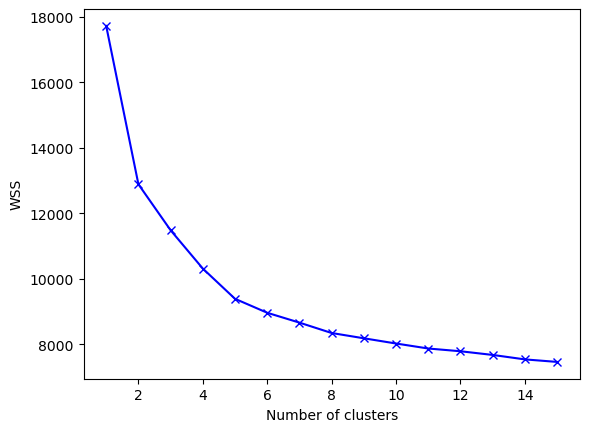

In [92]:
# Elbow method
plt.plot(a, wss, 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("WSS");

In [93]:
# Optimal number of clusters

k_means = KMeans(n_clusters = 4,random_state=123)
k_means.fit(df_rfe_scaled)
labels4 = k_means.labels_
labels4

array([0, 3, 3, ..., 3, 3, 0])

In [94]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [95]:
silhouette_score(df_rfe_scaled,labels4,random_state=123)

0.16333662726937964

In [96]:
k_means = KMeans(n_clusters = 3,random_state=123)
k_means.fit(df_rfe_scaled)
labels = k_means.labels_
labels

array([2, 0, 0, ..., 0, 0, 2])

In [97]:
silhouette_score(df_rfe_scaled,labels,random_state=123)

0.15141641827109006

In [98]:
k_means = KMeans(n_clusters = 5,random_state=123)
k_means.fit(df_rfe_scaled)
labels = k_means.labels_
labels

array([3, 0, 0, ..., 0, 0, 3])

In [99]:
silhouette_score(df_rfe_scaled,labels,random_state=123)

0.15871827906128066

**Appending to the original dataset**

In [100]:
df_n.shape

(2473, 20)

In [101]:
df_n["Clus_kmeans4"] = labels4
df_n.head()

,Result,Match_light_type,Match_format,Bowlers_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,Offshore,...,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,Clus_kmeans4
0,Loss,Day,ODI,3.0,3.0,Bowling,Srilanka,Summer,9940.0,No,...,3,0.0,2,3.0,6.0,0,54.0,3,1,0
1,Win,Day,T20,3.0,4.0,Batting,Zimbabwe,Summer,8400.0,No,...,1,0.0,0,3.0,6.0,0,69.0,2,1,3
2,Win,Day,ODI,2.0,2.0,Bowling,Kenya,Summer,7357.0,No,...,4,0.0,2,3.0,6.0,0,73.0,3,1,3
3,Loss,Night,ODI,1.0,3.0,Bowling,Srilanka,Summer,13328.0,No,...,4,0.0,0,3.0,6.0,0,80.0,3,1,3
4,Win,Night,ODI,3.0,4.0,Batting,Srilanka,Summer,11277.0,No,...,3,0.0,5,4.0,6.0,0,97.0,3,1,3


In [102]:
df_n.shape

(2473, 21)

**Cluster profiles**

In [103]:
df_n.Clus_kmeans4.value_counts().sort_index()

0    899
1    416
2    227
3    931
Name: Clus_kmeans4, dtype: int64

In [104]:
clust_profile=df_n
clust_profile=clust_profile.groupby('Clus_kmeans4').mean()
clust_profile['freq']=df_n.Clus_kmeans4.value_counts().sort_index()
np.round(clust_profile,2).T

Clus_kmeans4,0,1,2,3
Audience_number,31095.99,83842.77,103085.02,30317.32
Extra_bowls_bowled,7.76,20.12,23.19,7.60
Max_run_given_1over,6.93,17.90,7.00,6.67
extra_bowls_opponent,3.49,9.63,3.23,2.84
player_highest_run,47.97,65.36,65.94,83.35
freq,899.00,416.00,227.00,931.00


**Advanced EDA**

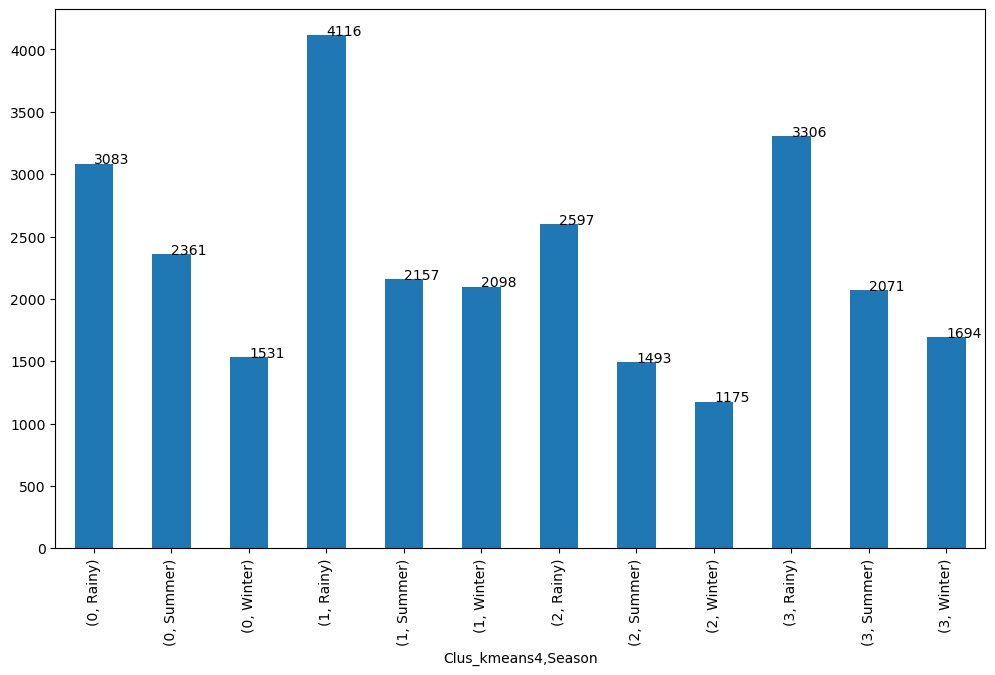

In [105]:
# xiv) Season and Extra_bowls_bowled based on cluster profiles:

ax=df_n.groupby(['Clus_kmeans4','Season']).sum()['Extra_bowls_bowled'].plot(kind='bar',figsize=(12,7))
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

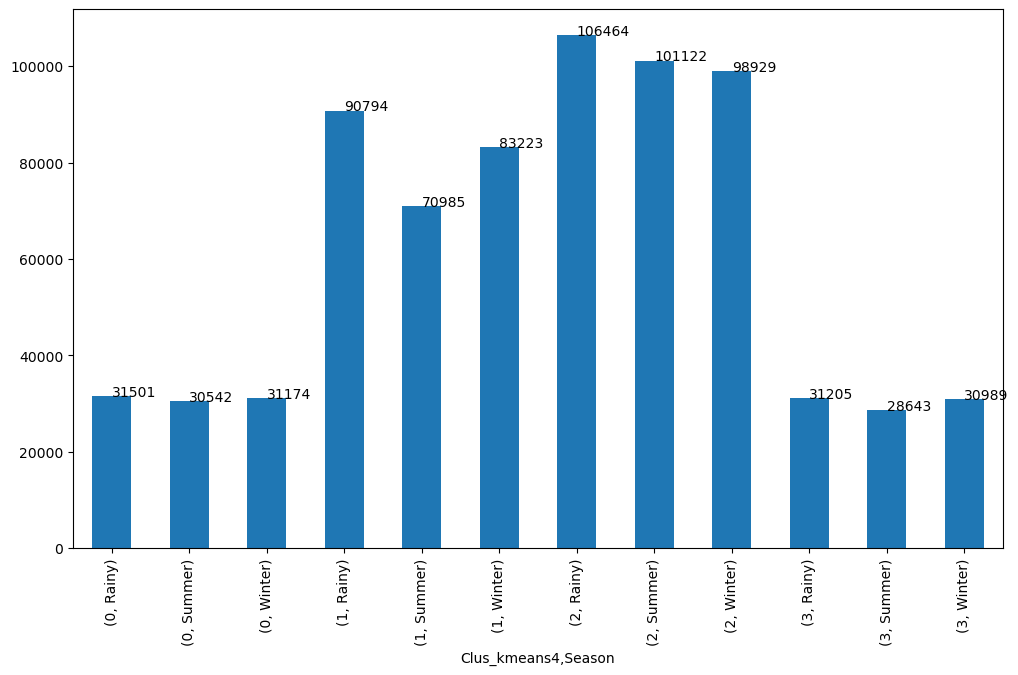

In [106]:
# xv) Season and Audience_number based on cluster profiles:

ax=df_n.groupby(['Clus_kmeans4','Season']).mean()['Audience_number'].plot(kind='bar',figsize=(12,7))
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

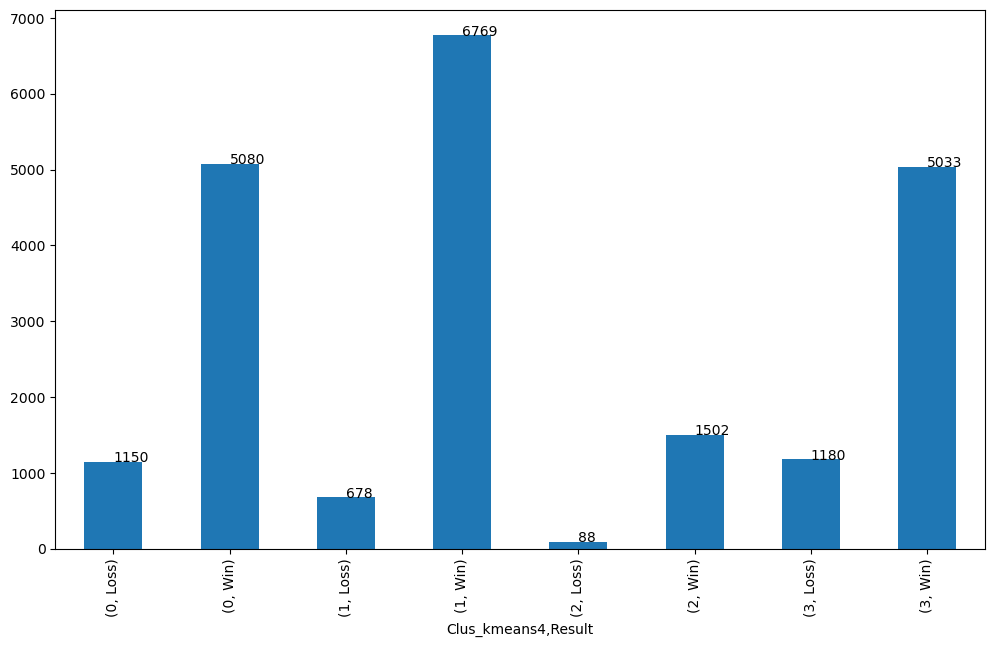

In [107]:
# xvi) Result and Max_run_given_1over based on cluster profiles:

ax=df_n.groupby(['Clus_kmeans4','Result']).sum()['Max_run_given_1over'].plot(kind='bar',figsize=(12,7))
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

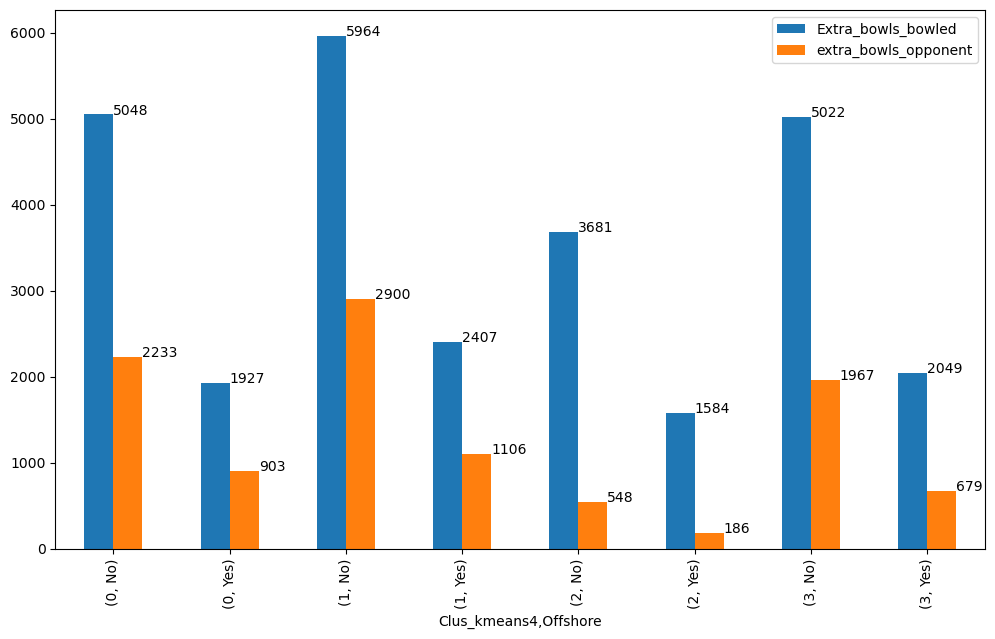

In [108]:
# xvii) Offshore, Extra_bowls_bowled and extra_bowls_opponent based on cluster profiles:

ax=df_n.groupby(['Clus_kmeans4','Offshore']).sum()[['Extra_bowls_bowled','extra_bowls_opponent']].plot(kind='bar',figsize=(12,7))
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

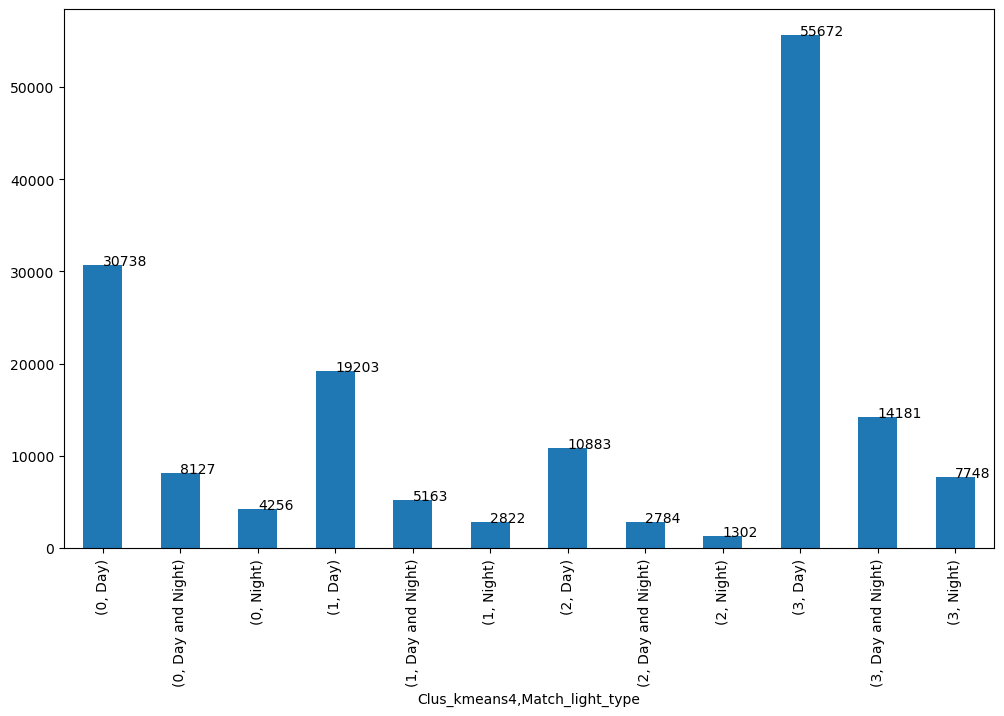

In [109]:
# xviii) Match_light_type and player_highest_run based on cluster profiles:

ax=df_n.groupby(['Clus_kmeans4','Match_light_type']).sum()['player_highest_run'].plot(kind='bar',figsize=(12,7))
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01));

# PROJECT NOTES - 2

In [110]:
df_new.head(3)

,Result,Match_light_type,Match_format,Bowlers_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,Offshore,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Loss,Day,ODI,3.0,3.0,Bowling,Srilanka,Summer,9940.0,No,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Win,Day,T20,3.0,4.0,Batting,Zimbabwe,Summer,8400.0,No,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Win,Day,ODI,2.0,2.0,Bowling,Kenya,Summer,7357.0,No,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1


In [111]:
df_enc_new = df_new.copy()

In [112]:
df_enc_new['Result'] = df_enc_new['Result'].astype('category')

In [113]:
df_enc_new['Result']=df_enc_new['Result'].cat.codes

In [114]:
df_enc_new.head(3)

,Result,Match_light_type,Match_format,Bowlers_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,Offshore,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,0,Day,ODI,3.0,3.0,Bowling,Srilanka,Summer,9940.0,No,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,1,Day,T20,3.0,4.0,Batting,Zimbabwe,Summer,8400.0,No,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,1,Day,ODI,2.0,2.0,Bowling,Kenya,Summer,7357.0,No,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1


In [115]:
df_enc_new.dtypes

Result                        int8
Match_light_type          category
Match_format              category
Bowlers_in_team           category
All_rounder_in_team       category
First_selection           category
Opponent                  category
Season                    category
Audience_number            float64
Offshore                  category
Max_run_scored_1over      category
Max_wicket_taken_1over    category
Extra_bowls_bowled         float64
Min_run_given_1over       category
Min_run_scored_1over      category
Max_run_given_1over        float64
extra_bowls_opponent         int64
player_highest_run         float64
Players_scored_zero       category
player_highest_wicket     category
dtype: object

In [116]:
# creating dummies
df_enc_new = pd.get_dummies(df_enc_new, drop_first = True)

In [117]:
df_enc_new.head(3)

,Result,Audience_number,Extra_bowls_bowled,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Match_light_type_Day and Night,Match_light_type_Night,Match_format_T20,Match_format_Test,...,Min_run_scored_1over_2.0,Min_run_scored_1over_3.0,Min_run_scored_1over_4.0,Players_scored_zero_2,Players_scored_zero_3,Players_scored_zero_4,player_highest_wicket_2,player_highest_wicket_3,player_highest_wicket_4,player_highest_wicket_5
0,0,9940.0,0.0,6.0,0,54.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,8400.0,0.0,6.0,0,69.0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
2,1,7357.0,0.0,6.0,0,73.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [118]:
df_mod = df_enc_new.copy()

**We are not treating outliers as we are using non-parametric models**

In [119]:
# **RFE with Random Forest**

In [120]:
# X = df_enc_new.drop('Result', axis = 1)
# y = df_enc_new['Result']

In [121]:
# rfcl = RandomForestClassifier()

In [122]:
# selector = RFE(estimator = rfcl, n_features_to_select=15, step=1)

In [123]:
# selector = selector.fit(X, y)

In [124]:
# selector.n_features_

In [125]:
# selector.ranking_

In [126]:
# cols=df_enc_new.drop(['Result'], axis = 1)

In [127]:
# rfe_new = pd.DataFrame({'Feature': cols.columns, 'Rank': selector.ranking_})
# rfe_new[rfe_new['Rank'] == 1]

In [128]:
# rfe_df_new = rfe_new[rfe_new['Rank'] == 1]

In [129]:
# rfe_df_new.head(3)

In [130]:
# rfe_df_new=df_enc_new.drop(['Result', 'Match_light_type_Night', 'Match_format_Test', 'Bowlers_in_team_2.0', 'Bowlers_in_team_3.0', 
#                             'Bowlers_in_team_4.0', 'Bowlers_in_team_5.0', 'All_rounder_in_team_2.0', 'Opponent_Bangladesh',
#                     'Opponent_England', 'Opponent_Kenya', 'Opponent_Pakistan', 'Opponent_South Africa', 'Opponent_Srilanka', 
#                     'Opponent_West Indies', 'Opponent_Zimbabwe', 'Season_Winter', 'Max_run_scored_1over_12.0', 'Max_run_scored_1over_13.0', 
#                     'Max_run_scored_1over_14.0', 'Max_run_scored_1over_15.0', 'Max_run_scored_1over_16.0', 'Max_run_scored_1over_17.0', 
#                     'Max_run_scored_1over_18.0', 'Max_run_scored_1over_19.0', 'Max_run_scored_1over_20.0', 'Max_run_scored_1over_21.0', 
#                     'Max_run_scored_1over_22.0', 'Max_run_scored_1over_23.0', 'Max_run_scored_1over_24.0', 'Max_run_scored_1over_25.0', 
#                     'Max_wicket_taken_1over_2', 'Max_wicket_taken_1over_3', 'Min_run_given_1over_1', 'Min_run_given_1over_2', 'Min_run_given_1over_3', 
#                     'Min_run_given_1over_4', 'Min_run_given_1over_5', 'Min_run_given_1over_6', 'Min_run_scored_1over_2.0', 'Min_run_scored_1over_4.0', 
#                     'Players_scored_zero_2', 'Players_scored_zero_4', 'player_highest_wicket_2', 'player_highest_wicket_3', 'player_highest_wicket_4', 
#                     'player_highest_wicket_5'], axis = 1)

In [131]:
# rfe_df_new.head(3)

In [132]:
# rfe_df_new.shape

In [133]:
# df_mod = pd.concat([rfe_df_new, y], axis = 1)
# df_mod.reset_index(drop=True, inplace=True)

In [134]:
df_mod.head(5)

,Result,Audience_number,Extra_bowls_bowled,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Match_light_type_Day and Night,Match_light_type_Night,Match_format_T20,Match_format_Test,...,Min_run_scored_1over_2.0,Min_run_scored_1over_3.0,Min_run_scored_1over_4.0,Players_scored_zero_2,Players_scored_zero_3,Players_scored_zero_4,player_highest_wicket_2,player_highest_wicket_3,player_highest_wicket_4,player_highest_wicket_5
0,0,9940.0,0.0,6.0,0,54.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,8400.0,0.0,6.0,0,69.0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
2,1,7357.0,0.0,6.0,0,73.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,13328.0,0.0,6.0,0,80.0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,1,11277.0,0.0,6.0,0,97.0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


### Unscaled data

In [135]:
df_mod.shape

(2473, 62)

In [136]:
X = df_mod.drop('Result', axis=1)
y = df_mod['Result']

In [137]:
# Split X and y into training and test set in 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=123)

### SMOTE - Unscaled data

In [138]:
# SMOTE
from numpy import where
from collections import Counter
from imblearn.over_sampling import SMOTE

In [139]:
sm = SMOTE(random_state=123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

### Scaled data

In [140]:
df_mod_sc = df_mod.copy()

In [141]:
df_mod_sc.head(3)

,Result,Audience_number,Extra_bowls_bowled,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Match_light_type_Day and Night,Match_light_type_Night,Match_format_T20,Match_format_Test,...,Min_run_scored_1over_2.0,Min_run_scored_1over_3.0,Min_run_scored_1over_4.0,Players_scored_zero_2,Players_scored_zero_3,Players_scored_zero_4,player_highest_wicket_2,player_highest_wicket_3,player_highest_wicket_4,player_highest_wicket_5
0,0,9940.0,0.0,6.0,0,54.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1,8400.0,0.0,6.0,0,69.0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
2,1,7357.0,0.0,6.0,0,73.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [142]:
df_mod_sc = df_mod_sc[['Audience_number', 'Extra_bowls_bowled', 'Max_run_given_1over', 'extra_bowls_opponent', 'player_highest_run']].apply(zscore)

In [143]:
df_mod_scaled = pd.concat([df_mod_sc, df_mod[[
       'Match_light_type_Day and Night', 'Match_light_type_Night',
       'Match_format_T20', 'Match_format_Test', 'Bowlers_in_team_2.0',
       'Bowlers_in_team_3.0', 'Bowlers_in_team_4.0', 'Bowlers_in_team_5.0',
       'All_rounder_in_team_2.0', 'All_rounder_in_team_3.0',
       'All_rounder_in_team_4.0', 'First_selection_Bowling',
       'Opponent_Bangladesh', 'Opponent_England', 'Opponent_Kenya',
       'Opponent_Pakistan', 'Opponent_South Africa', 'Opponent_Srilanka',
       'Opponent_West Indies', 'Opponent_Zimbabwe', 'Season_Summer',
       'Season_Winter', 'Offshore_Yes', 'Max_run_scored_1over_12.0',
       'Max_run_scored_1over_13.0', 'Max_run_scored_1over_14.0',
       'Max_run_scored_1over_15.0', 'Max_run_scored_1over_16.0',
       'Max_run_scored_1over_17.0', 'Max_run_scored_1over_18.0',
       'Max_run_scored_1over_19.0', 'Max_run_scored_1over_20.0',
       'Max_run_scored_1over_21.0', 'Max_run_scored_1over_22.0',
       'Max_run_scored_1over_23.0', 'Max_run_scored_1over_24.0',
       'Max_run_scored_1over_25.0', 'Max_wicket_taken_1over_2',
       'Max_wicket_taken_1over_3', 'Max_wicket_taken_1over_4',
       'Min_run_given_1over_1', 'Min_run_given_1over_2',
       'Min_run_given_1over_3', 'Min_run_given_1over_4',
       'Min_run_given_1over_5', 'Min_run_given_1over_6',
       'Min_run_scored_1over_2.0', 'Min_run_scored_1over_3.0',
       'Min_run_scored_1over_4.0', 'Players_scored_zero_2',
       'Players_scored_zero_3', 'Players_scored_zero_4',
       'player_highest_wicket_2', 'player_highest_wicket_3',
       'player_highest_wicket_4', 'player_highest_wicket_5', 'Result']]], axis = 1)

In [144]:
df_mod_scaled.reset_index(drop=True, inplace=True)

In [145]:
df_mod_scaled.head(3)

,Audience_number,Extra_bowls_bowled,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Match_light_type_Day and Night,Match_light_type_Night,Match_format_T20,Match_format_Test,Bowlers_in_team_2.0,...,Min_run_scored_1over_3.0,Min_run_scored_1over_4.0,Players_scored_zero_2,Players_scored_zero_3,Players_scored_zero_4,player_highest_wicket_2,player_highest_wicket_3,player_highest_wicket_4,player_highest_wicket_5,Result
0,-0.717016,-1.436938,-0.534223,-1.159421,-0.586103,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
1,-0.747398,-1.436938,-0.534223,-1.159421,0.154992,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
2,-0.767976,-1.436938,-0.534223,-1.159421,0.352617,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [146]:
X_scaled = df_mod_scaled.drop('Result', axis=1)
y_scaled = df_mod_scaled['Result']

In [147]:
# Split X and y into training and test set in 80:20 ratio
from sklearn.model_selection import train_test_split
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y_scaled, test_size=0.20 , random_state=123)

### SMOTE - Scaled data

In [148]:
sm_scal = SMOTE(random_state=123)
X_scaled_train_res, y_scaled_train_res = sm_scal.fit_resample(X_scaled_train, y_scaled_train.ravel())

## 1) Random Forest

In [149]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=123)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [150]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [151]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[ 316    0]
 [   0 1662]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       316
           1       1.00      1.00      1.00      1662

    accuracy                           1.00      1978
   macro avg       1.00      1.00      1.00      1978
weighted avg       1.00      1.00      1.00      1978



### AUC and ROC for the training data

AUC: 1.000


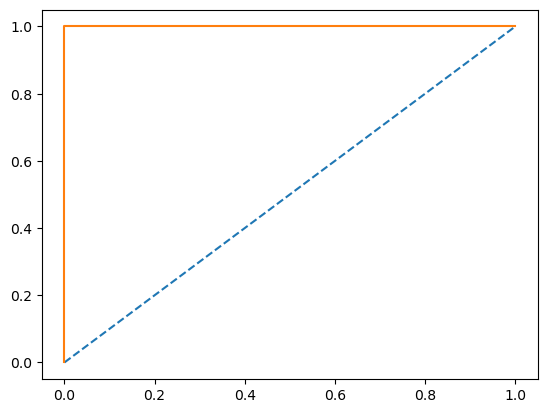

In [152]:
probs = RF_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [153]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9414141414141414
[[ 62  24]
 [  5 404]]
              precision    recall  f1-score   support

           0       0.93      0.72      0.81        86
           1       0.94      0.99      0.97       409

    accuracy                           0.94       495
   macro avg       0.93      0.85      0.89       495
weighted avg       0.94      0.94      0.94       495



### AUC and ROC for the test data

AUC: 1.000


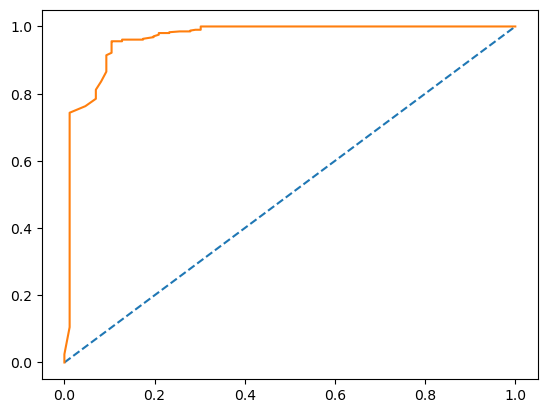

In [154]:
probs = RF_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Applying GridSearchCV for Random forest

In [155]:
param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9],
    'criterion' :['gini', 'entropy']
}

In [156]:
RFE_grid = RandomForestClassifier(random_state=123)

In [157]:
grid_search = GridSearchCV(estimator=RFE_grid, param_grid=param, cv= 5)

In [158]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [159]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 200} 

RandomForestClassifier(max_depth=9, n_estimators=200, random_state=123)


In [160]:
best_model = grid_search.best_estimator_

In [161]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [162]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.045883,0.954117
1,0.124676,0.875324
2,0.600512,0.399488
3,0.147637,0.852363
4,0.610455,0.389545


In [163]:
grid_search.score(X_train,y_train)

0.9256825075834176

In [164]:
grid_search.score(X_test,y_test)

0.8868686868686869

In [165]:
# train data

print(metrics.confusion_matrix(y_train, ytrain_predict))
print(metrics.classification_report(y_train, ytrain_predict))

[[ 169  147]
 [   0 1662]]
              precision    recall  f1-score   support

           0       1.00      0.53      0.70       316
           1       0.92      1.00      0.96      1662

    accuracy                           0.93      1978
   macro avg       0.96      0.77      0.83      1978
weighted avg       0.93      0.93      0.92      1978



### AUC and ROC for the train data

AUC: 0.998


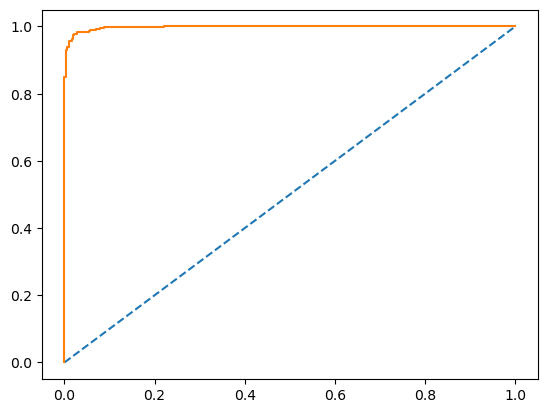

In [166]:
probs = grid_search.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [167]:
# test data

print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

[[ 32  54]
 [  2 407]]
              precision    recall  f1-score   support

           0       0.94      0.37      0.53        86
           1       0.88      1.00      0.94       409

    accuracy                           0.89       495
   macro avg       0.91      0.68      0.73       495
weighted avg       0.89      0.89      0.87       495



### AUC and ROC for the test data

AUC: 0.998


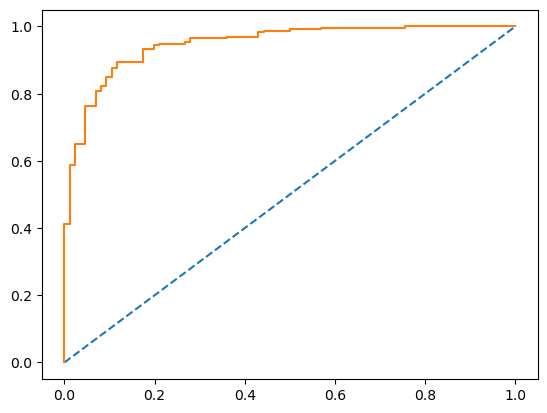

In [168]:
probs = grid_search.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## 2) Random Forest with SMOTE

In [169]:
RF_SM_model=RandomForestClassifier(n_estimators=100,random_state=123)
RF_SM_model.fit(X_train_res,y_train_res)

RandomForestClassifier(random_state=123)

In [170]:
## Performance Matrix on train data set
y_train_predict = RF_SM_model.predict(X_train_res)
model_score =RF_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

1.0
[[1662    0]
 [   0 1662]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1662
           1       1.00      1.00      1.00      1662

    accuracy                           1.00      3324
   macro avg       1.00      1.00      1.00      3324
weighted avg       1.00      1.00      1.00      3324



### AUC and ROC for the training data

AUC: 1.000


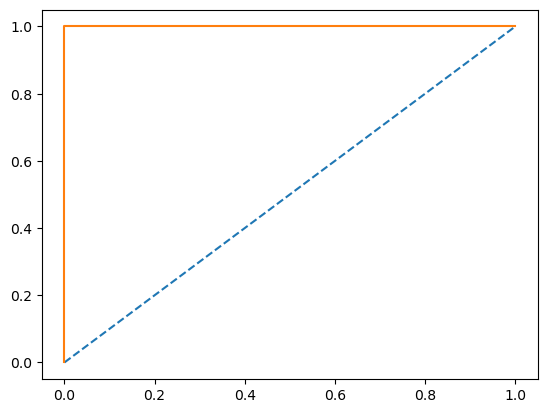

In [171]:
probs = RF_SM_model.predict_proba(X_train_res)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [172]:
## Performance Matrix on test data set
y_test_predict = RF_SM_model.predict(X_test)
model_score = RF_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9474747474747475
[[ 65  21]
 [  5 404]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.83        86
           1       0.95      0.99      0.97       409

    accuracy                           0.95       495
   macro avg       0.94      0.87      0.90       495
weighted avg       0.95      0.95      0.95       495



### AUC and ROC for the test data

AUC: 1.000


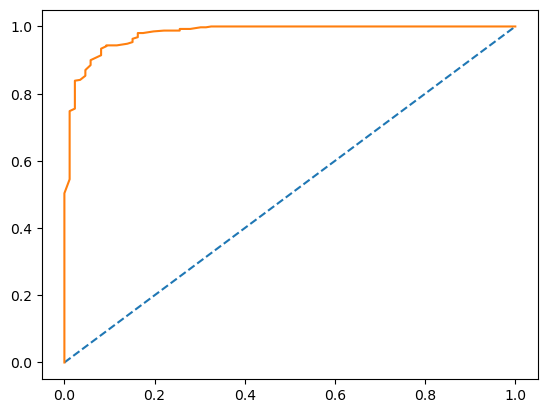

In [173]:
probs = RF_SM_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Applying GridSearchCV for Random forest with SMOTE

In [174]:
param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9],
    'criterion' :['gini', 'entropy']
}

In [175]:
RFE_grid_smote = RandomForestClassifier(random_state=123)

In [176]:
grid_search = GridSearchCV(estimator=RFE_grid_smote, param_grid=param, cv= 5)

In [177]:
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [178]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 500} 

RandomForestClassifier(max_depth=9, n_estimators=500, random_state=123)


In [179]:
best_model = grid_search.best_estimator_

In [180]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train_res)
ytest_predict = best_model.predict(X_test)

In [181]:
best_model

RandomForestClassifier(max_depth=9, n_estimators=500, random_state=123)

In [182]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.133617,0.866383
1,0.171322,0.828678
2,0.646811,0.353189
3,0.437380,0.562620
4,0.559478,0.440522


In [183]:
grid_search.score(X_train_res,y_train_res)

0.9882671480144405

In [184]:
grid_search.score(X_test,y_test)

0.9232323232323232

In [185]:
# train data
print(metrics.confusion_matrix(y_train_res, ytrain_predict))
print(metrics.classification_report(y_train_res, ytrain_predict))

[[1637   25]
 [  14 1648]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1662
           1       0.99      0.99      0.99      1662

    accuracy                           0.99      3324
   macro avg       0.99      0.99      0.99      3324
weighted avg       0.99      0.99      0.99      3324



In [186]:
# test data
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

[[ 57  29]
 [  9 400]]
              precision    recall  f1-score   support

           0       0.86      0.66      0.75        86
           1       0.93      0.98      0.95       409

    accuracy                           0.92       495
   macro avg       0.90      0.82      0.85       495
weighted avg       0.92      0.92      0.92       495



### AUC and ROC for the train data

AUC: 0.999


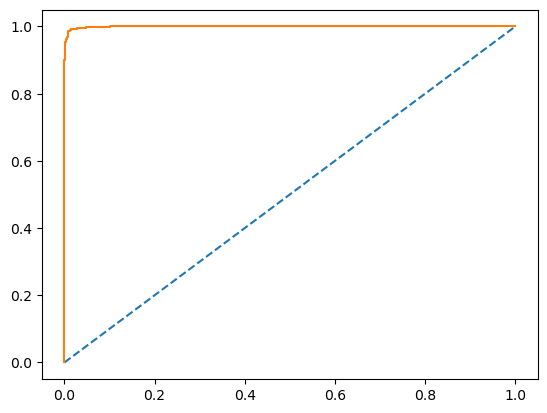

In [187]:
probs = grid_search.predict_proba(X_train_res)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.999


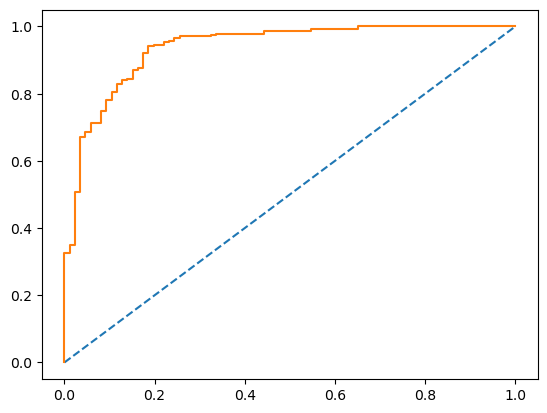

In [188]:
probs = grid_search.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## 3) Naive Bayes model

In [189]:
from sklearn.naive_bayes import GaussianNB

In [190]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [191]:
## Performance Matrix on train data set

y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7507583417593529
[[ 158  158]
 [ 335 1327]]
              precision    recall  f1-score   support

           0       0.32      0.50      0.39       316
           1       0.89      0.80      0.84      1662

    accuracy                           0.75      1978
   macro avg       0.61      0.65      0.62      1978
weighted avg       0.80      0.75      0.77      1978



In [192]:
## Performance Matrix on test data set

y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7474747474747475
[[ 46  40]
 [ 85 324]]
              precision    recall  f1-score   support

           0       0.35      0.53      0.42        86
           1       0.89      0.79      0.84       409

    accuracy                           0.75       495
   macro avg       0.62      0.66      0.63       495
weighted avg       0.80      0.75      0.77       495



### AUC and ROC for the train data

AUC: 0.695


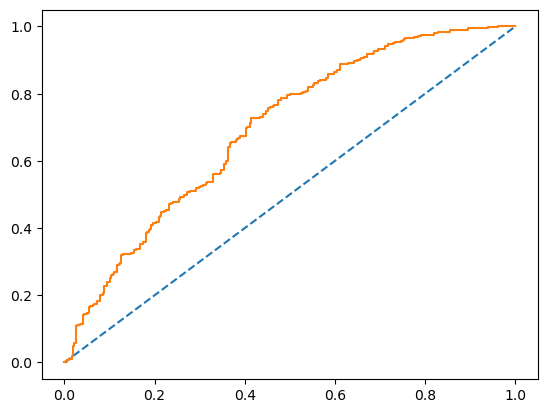

In [193]:
probs = NB_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.695


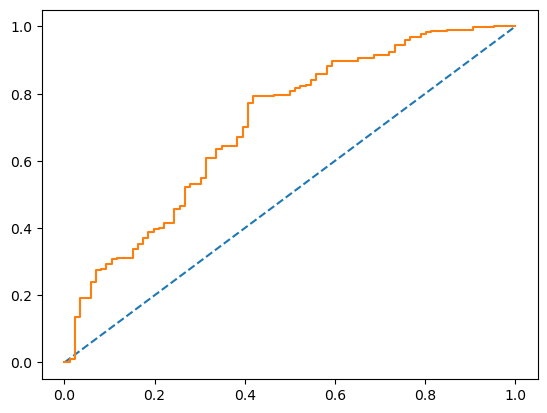

In [194]:
probs = NB_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## 4) Naive Bayes with SMOTE

In [195]:
NB_sm_model = GaussianNB()
NB_sm_model.fit(X_train_res, y_train_res)

GaussianNB()

In [196]:
## Performance Matrix on train data set

y_train_predict = NB_sm_model.predict(X_train_res)
model_score = NB_sm_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.5794223826714802
[[1490  172]
 [1226  436]]
              precision    recall  f1-score   support

           0       0.55      0.90      0.68      1662
           1       0.72      0.26      0.38      1662

    accuracy                           0.58      3324
   macro avg       0.63      0.58      0.53      3324
weighted avg       0.63      0.58      0.53      3324



In [197]:
## Performance Matrix on test data set

y_test_predict = NB_sm_model.predict(X_test)
model_score = NB_sm_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.3939393939393939
[[ 79   7]
 [293 116]]
              precision    recall  f1-score   support

           0       0.21      0.92      0.34        86
           1       0.94      0.28      0.44       409

    accuracy                           0.39       495
   macro avg       0.58      0.60      0.39       495
weighted avg       0.82      0.39      0.42       495



### AUC and ROC for the train data

AUC: 0.750


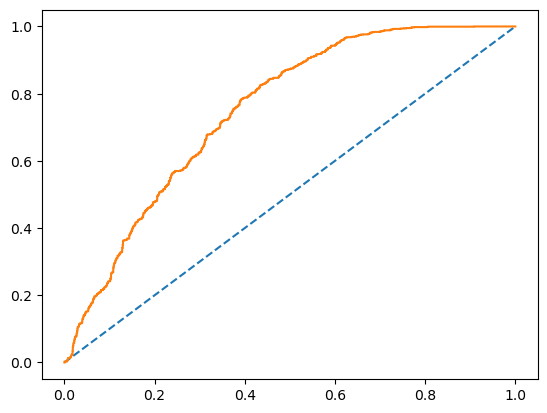

In [198]:
probs = NB_sm_model.predict_proba(X_train_res)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.750


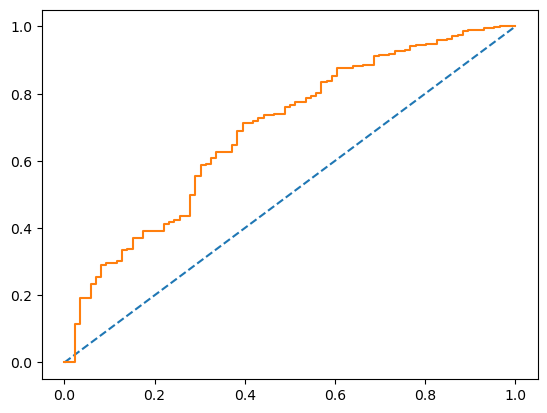

In [199]:
probs = NB_sm_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## 5) KNN model

### KNN model needs the data to be scaled

In [200]:
from sklearn.neighbors import KNeighborsClassifier

In [201]:
KNN_model=KNeighborsClassifier(n_neighbors=15)
KNN_model.fit(X_scaled_train,y_scaled_train)

KNeighborsClassifier(n_neighbors=15)

In [202]:
## Performance Matrix on train data set

y_train_predict = KNN_model.predict(X_scaled_train.values)
model_score = KNN_model.score(X_scaled_train.values, y_scaled_train)
print(model_score)
print(metrics.confusion_matrix(y_scaled_train, y_train_predict))
print(metrics.classification_report(y_scaled_train, y_train_predict))

0.8660262891809909
[[  59  257]
 [   8 1654]]
              precision    recall  f1-score   support

           0       0.88      0.19      0.31       316
           1       0.87      1.00      0.93      1662

    accuracy                           0.87      1978
   macro avg       0.87      0.59      0.62      1978
weighted avg       0.87      0.87      0.83      1978



In [203]:
## Performance Matrix on test data set

y_test_predict = KNN_model.predict(X_scaled_test.values)
model_score = KNN_model.score(X_scaled_test.values, y_scaled_test)
print(model_score)
print(metrics.confusion_matrix(y_scaled_test, y_test_predict))
print(metrics.classification_report(y_scaled_test, y_test_predict))

0.8525252525252526
[[ 16  70]
 [  3 406]]
              precision    recall  f1-score   support

           0       0.84      0.19      0.30        86
           1       0.85      0.99      0.92       409

    accuracy                           0.85       495
   macro avg       0.85      0.59      0.61       495
weighted avg       0.85      0.85      0.81       495



### AUC and ROC for the train data

AUC: 0.868


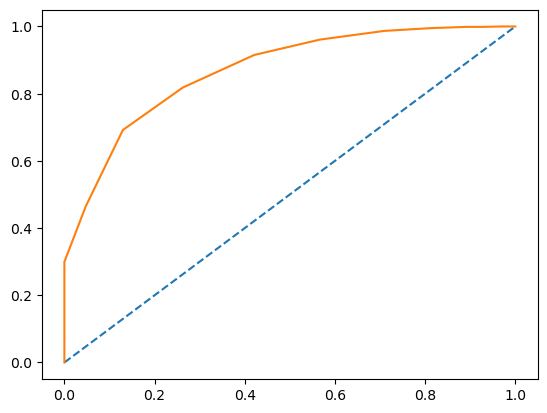

In [204]:
probs = KNN_model.predict_proba(X_scaled_train.values)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_scaled_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_scaled_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.868


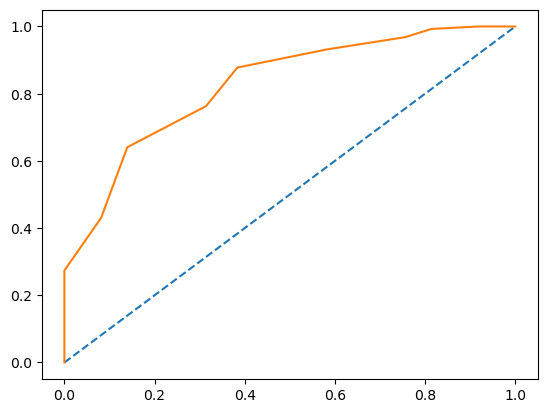

In [205]:
probs = KNN_model.predict_proba(X_scaled_test.values)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_scaled_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_scaled_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## 6) KNN model with SMOTE

In [206]:
KNN_sm_model=KNeighborsClassifier(n_neighbors=15)
KNN_sm_model.fit(X_scaled_train_res,y_scaled_train_res)

KNeighborsClassifier(n_neighbors=15)

In [207]:
## Performance Matrix on train data set

y_train_predict = KNN_sm_model.predict(X_scaled_train_res.values)
model_score = KNN_sm_model.score(X_scaled_train_res.values, y_scaled_train_res)
print(model_score)
print(metrics.confusion_matrix(y_scaled_train_res, y_train_predict))
print(metrics.classification_report(y_scaled_train_res, y_train_predict))

0.7512033694344163
[[1657    5]
 [ 822  840]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1662
           1       0.99      0.51      0.67      1662

    accuracy                           0.75      3324
   macro avg       0.83      0.75      0.74      3324
weighted avg       0.83      0.75      0.74      3324



In [208]:
## Performance Matrix on test data set

y_test_predict = KNN_sm_model.predict(X_scaled_test.values)
model_score = KNN_sm_model.score(X_scaled_test.values, y_scaled_test)
print(model_score)
print(metrics.confusion_matrix(y_scaled_test, y_test_predict))
print(metrics.classification_report(y_scaled_test, y_test_predict))

0.5575757575757576
[[ 82   4]
 [215 194]]
              precision    recall  f1-score   support

           0       0.28      0.95      0.43        86
           1       0.98      0.47      0.64       409

    accuracy                           0.56       495
   macro avg       0.63      0.71      0.53       495
weighted avg       0.86      0.56      0.60       495



### AUC and ROC for the train data

AUC: 0.987


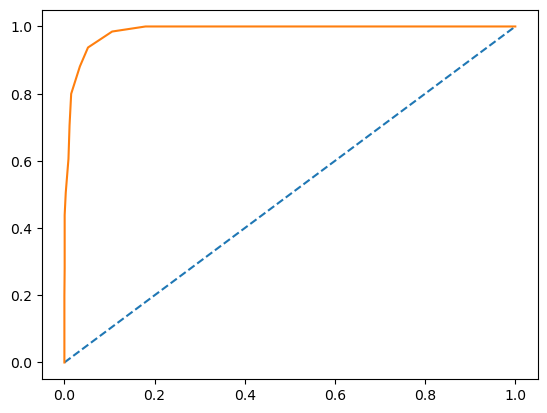

In [209]:
probs = KNN_sm_model.predict_proba(X_scaled_train_res.values)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_scaled_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_scaled_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.987


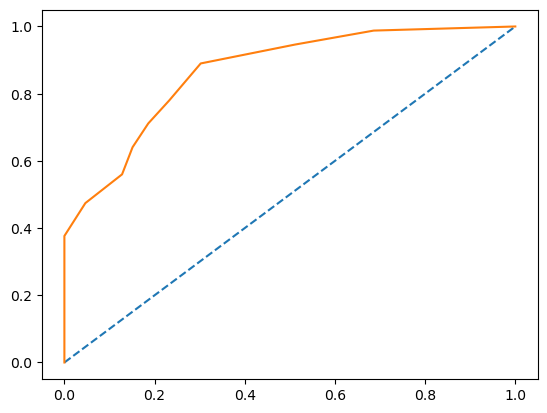

In [210]:
probs = KNN_sm_model.predict_proba(X_scaled_test.values)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_scaled_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_scaled_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## 7) Decision Tree model

In [211]:
from sklearn import tree

In [212]:
DT_model= tree.DecisionTreeClassifier(random_state=123)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [213]:
## Performance Matrix on train data set

y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[ 316    0]
 [   0 1662]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       316
           1       1.00      1.00      1.00      1662

    accuracy                           1.00      1978
   macro avg       1.00      1.00      1.00      1978
weighted avg       1.00      1.00      1.00      1978



In [214]:
## Performance Matrix on test data set

y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9373737373737374
[[ 72  14]
 [ 17 392]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        86
           1       0.97      0.96      0.96       409

    accuracy                           0.94       495
   macro avg       0.89      0.90      0.89       495
weighted avg       0.94      0.94      0.94       495



In [215]:
print (pd.DataFrame(DT_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                              Imp
Audience_number          0.190254
Extra_bowls_bowled       0.070956
Max_run_given_1over      0.019654
extra_bowls_opponent     0.041867
player_highest_run       0.068613
...                           ...
Players_scored_zero_4    0.025875
player_highest_wicket_2  0.000000
player_highest_wicket_3  0.010986
player_highest_wicket_4  0.002825
player_highest_wicket_5  0.000000

[61 rows x 1 columns]


### Regularising the Decision Tree

In [216]:
from sklearn.tree import DecisionTreeClassifier

In [217]:
reg_DT_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30, random_state=123)
reg_DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30,
                       random_state=123)

In [218]:
## Performance Matrix on train data set

y_train_predict = reg_DT_model.predict(X_train)
model_score = reg_DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8897876643073812
[[ 153  163]
 [  55 1607]]
              precision    recall  f1-score   support

           0       0.74      0.48      0.58       316
           1       0.91      0.97      0.94      1662

    accuracy                           0.89      1978
   macro avg       0.82      0.73      0.76      1978
weighted avg       0.88      0.89      0.88      1978



In [219]:
## Performance Matrix on test data set

y_test_predict = reg_DT_model.predict(X_test)
model_score = reg_DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8484848484848485
[[ 38  48]
 [ 27 382]]
              precision    recall  f1-score   support

           0       0.58      0.44      0.50        86
           1       0.89      0.93      0.91       409

    accuracy                           0.85       495
   macro avg       0.74      0.69      0.71       495
weighted avg       0.84      0.85      0.84       495



### AUC and ROC for the train data

AUC: 0.875


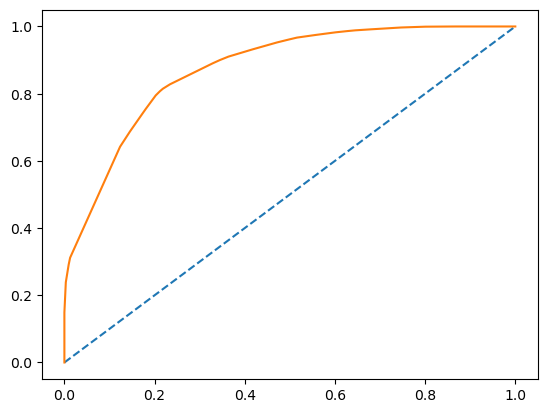

In [220]:
probs = reg_DT_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.875


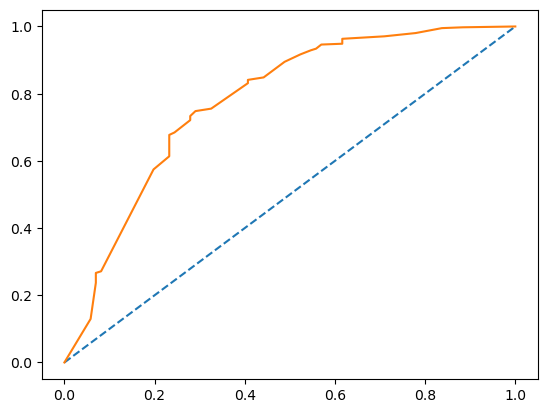

In [221]:
probs = reg_DT_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## 8) Decision Tree with SMOTE

In [222]:
DT_sm_model= tree.DecisionTreeClassifier(random_state=123)
DT_sm_model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=123)

In [223]:
## Performance Matrix on train data set

y_train_predict = DT_sm_model.predict(X_train_res)
model_score = DT_sm_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

1.0
[[1662    0]
 [   0 1662]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1662
           1       1.00      1.00      1.00      1662

    accuracy                           1.00      3324
   macro avg       1.00      1.00      1.00      3324
weighted avg       1.00      1.00      1.00      3324



In [224]:
## Performance Matrix on test data set

y_test_predict = DT_sm_model.predict(X_test)
model_score = DT_sm_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8848484848484849
[[ 67  19]
 [ 38 371]]
              precision    recall  f1-score   support

           0       0.64      0.78      0.70        86
           1       0.95      0.91      0.93       409

    accuracy                           0.88       495
   macro avg       0.79      0.84      0.82       495
weighted avg       0.90      0.88      0.89       495



In [225]:
print (pd.DataFrame(DT_sm_model.feature_importances_, columns = ["Imp"], index = X_train_res.columns))

                              Imp
Audience_number          0.142169
Extra_bowls_bowled       0.079852
Max_run_given_1over      0.010580
extra_bowls_opponent     0.058683
player_highest_run       0.045305
...                           ...
Players_scored_zero_4    0.116951
player_highest_wicket_2  0.018701
player_highest_wicket_3  0.000000
player_highest_wicket_4  0.000000
player_highest_wicket_5  0.000000

[61 rows x 1 columns]


### Regularising the Decision Tree with SMOTE

In [226]:
reg_DT_sm_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30, random_state=123)
reg_DT_sm_model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30,
                       random_state=123)

In [227]:
## Performance Matrix on train data set

y_train_predict = reg_DT_sm_model.predict(X_train_res)
model_score = reg_DT_sm_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8580024067388689
[[1520  142]
 [ 330 1332]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1662
           1       0.90      0.80      0.85      1662

    accuracy                           0.86      3324
   macro avg       0.86      0.86      0.86      3324
weighted avg       0.86      0.86      0.86      3324



In [228]:
## Performance Matrix on test data set

y_test_predict = reg_DT_sm_model.predict(X_test)
model_score = reg_DT_sm_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7131313131313132
[[ 47  39]
 [103 306]]
              precision    recall  f1-score   support

           0       0.31      0.55      0.40        86
           1       0.89      0.75      0.81       409

    accuracy                           0.71       495
   macro avg       0.60      0.65      0.60       495
weighted avg       0.79      0.71      0.74       495



### AUC and ROC for the train data

AUC: 0.944


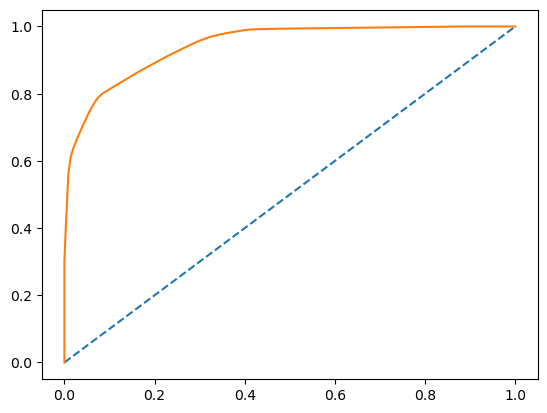

In [229]:
probs = reg_DT_sm_model.predict_proba(X_train_res)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.944


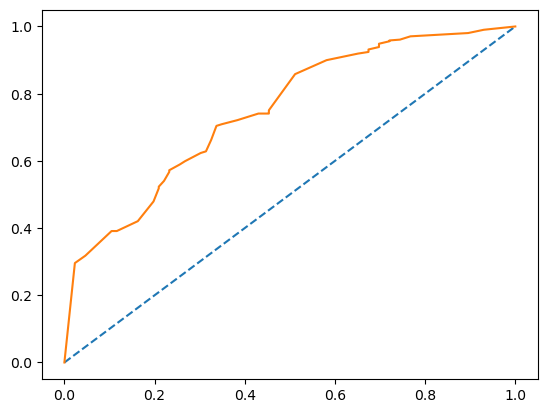

In [230]:
probs = reg_DT_sm_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## 9) AdaBoosting

In [231]:
from sklearn.ensemble import AdaBoostClassifier

In [232]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=123)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=123)

In [233]:
## Performance Matrix on train data set

y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8933265925176946
[[ 144  172]
 [  39 1623]]
              precision    recall  f1-score   support

           0       0.79      0.46      0.58       316
           1       0.90      0.98      0.94      1662

    accuracy                           0.89      1978
   macro avg       0.85      0.72      0.76      1978
weighted avg       0.89      0.89      0.88      1978



In [234]:
## Performance Matrix on test data set

y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8888888888888888
[[ 41  45]
 [ 10 399]]
              precision    recall  f1-score   support

           0       0.80      0.48      0.60        86
           1       0.90      0.98      0.94       409

    accuracy                           0.89       495
   macro avg       0.85      0.73      0.77       495
weighted avg       0.88      0.89      0.88       495



### AUC and ROC for the train data

AUC: 0.896


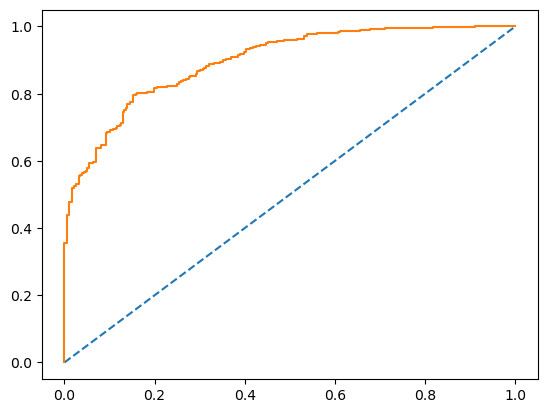

In [235]:
probs = ADB_model.predict_proba(X_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.896


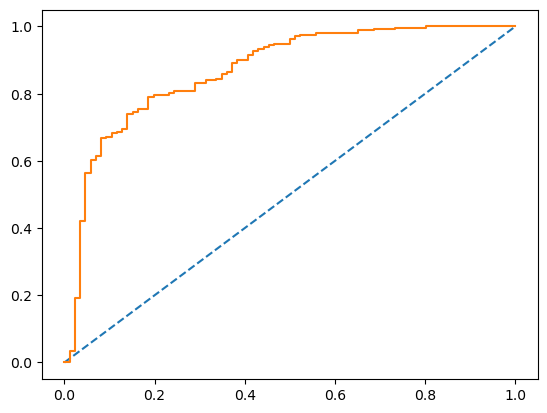

In [236]:
probs = ADB_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Applying GridSearchCV for AdaBoosting

In [237]:
param = { 
    'n_estimators': [50, 100, 150],
    'learning_rate': [1.0, 0.001, 0.01, 0.2, 0.3],
    'algorithm': ['SAMME']
}

In [238]:
ADB_grid = AdaBoostClassifier(random_state=123)

In [239]:
grid_search = GridSearchCV(estimator=ADB_grid, param_grid=param, cv= 5, n_jobs=4)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=123), n_jobs=4,
             param_grid={'algorithm': ['SAMME'],
                         'learning_rate': [1.0, 0.001, 0.01, 0.2, 0.3],
                         'n_estimators': [50, 100, 150]})

In [240]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 150} 

AdaBoostClassifier(algorithm='SAMME', n_estimators=150, random_state=123)


In [241]:
best_model = grid_search.best_estimator_

In [242]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [243]:
best_model

AdaBoostClassifier(algorithm='SAMME', n_estimators=150, random_state=123)

In [244]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.433230,0.566770
1,0.466377,0.533623
2,0.508977,0.491023
3,0.486457,0.513543
4,0.524918,0.475082


In [245]:
# train data
print(metrics.confusion_matrix(y_train, ytrain_predict))
print(metrics.classification_report(y_train, ytrain_predict))

[[  89  227]
 [  24 1638]]
              precision    recall  f1-score   support

           0       0.79      0.28      0.41       316
           1       0.88      0.99      0.93      1662

    accuracy                           0.87      1978
   macro avg       0.83      0.63      0.67      1978
weighted avg       0.86      0.87      0.85      1978



In [246]:
# test data
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

[[ 29  57]
 [  5 404]]
              precision    recall  f1-score   support

           0       0.85      0.34      0.48        86
           1       0.88      0.99      0.93       409

    accuracy                           0.87       495
   macro avg       0.86      0.66      0.71       495
weighted avg       0.87      0.87      0.85       495



## 10) AdaBoosting with SMOTE

In [247]:
ADB_sm_model = AdaBoostClassifier(n_estimators=100,random_state=123)
ADB_sm_model.fit(X_train_res, y_train_res)

AdaBoostClassifier(n_estimators=100, random_state=123)

In [248]:
## Performance Matrix on train data set

y_train_predict = ADB_sm_model.predict(X_train_res)
model_score = ADB_sm_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.891395908543923
[[1442  220]
 [ 141 1521]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1662
           1       0.87      0.92      0.89      1662

    accuracy                           0.89      3324
   macro avg       0.89      0.89      0.89      3324
weighted avg       0.89      0.89      0.89      3324



In [249]:
## Performance Matrix on test data set

y_test_predict = ADB_sm_model.predict(X_test)
model_score = ADB_sm_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8424242424242424
[[ 52  34]
 [ 44 365]]
              precision    recall  f1-score   support

           0       0.54      0.60      0.57        86
           1       0.91      0.89      0.90       409

    accuracy                           0.84       495
   macro avg       0.73      0.75      0.74       495
weighted avg       0.85      0.84      0.85       495



### AUC and ROC for the train data

AUC: 0.962


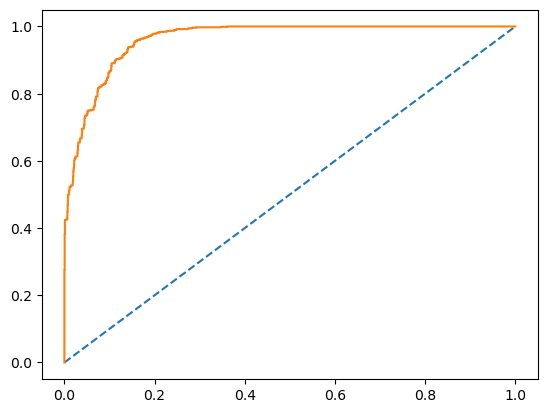

In [250]:
probs = ADB_sm_model.predict_proba(X_train_res)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.962


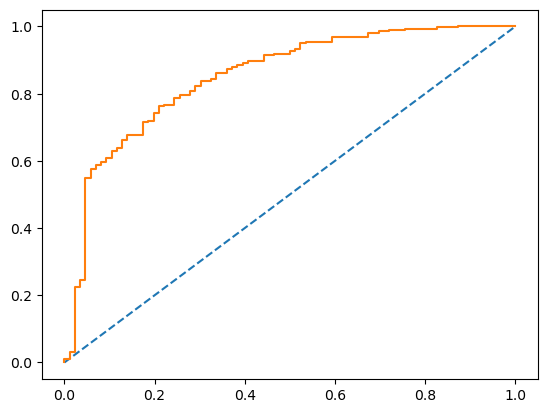

In [251]:
probs = ADB_sm_model.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Applying GridSearchCV for AdaBoosting

In [252]:
param = { 
    'n_estimators': [50, 100, 150],
    'learning_rate': [1.0, 0.001, 0.01, 0.2, 0.3],
    'algorithm': ['SAMME']
}

In [253]:
ADB_sm_grid = AdaBoostClassifier(random_state=123)

In [254]:
grid_search = GridSearchCV(estimator=ADB_sm_grid, param_grid=param, cv= 5, n_jobs=4)
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=123), n_jobs=4,
             param_grid={'algorithm': ['SAMME'],
                         'learning_rate': [1.0, 0.001, 0.01, 0.2, 0.3],
                         'n_estimators': [50, 100, 150]})

In [255]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 100} 

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=123)


In [256]:
best_model = grid_search.best_estimator_

In [257]:
ytrain_predict = best_model.predict(X_train_res)
ytest_predict = best_model.predict(X_test)

In [258]:
best_model

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=123)

In [259]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.448558,0.551442
1,0.479370,0.520630
2,0.503056,0.496944
3,0.498787,0.501213
4,0.506369,0.493631


In [260]:
# train data
print(metrics.confusion_matrix(y_train_res, ytrain_predict))
print(metrics.classification_report(y_train_res, ytrain_predict))

[[1436  226]
 [ 199 1463]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1662
           1       0.87      0.88      0.87      1662

    accuracy                           0.87      3324
   macro avg       0.87      0.87      0.87      3324
weighted avg       0.87      0.87      0.87      3324



In [261]:
# test data
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

[[ 52  34]
 [ 48 361]]
              precision    recall  f1-score   support

           0       0.52      0.60      0.56        86
           1       0.91      0.88      0.90       409

    accuracy                           0.83       495
   macro avg       0.72      0.74      0.73       495
weighted avg       0.85      0.83      0.84       495



## 11) SVM model

In [262]:
from sklearn.svm import SVC

In [263]:
SVM_model = SVC(probability=True, random_state=123)
SVM_model.fit(X_scaled_train,y_scaled_train)

SVC(probability=True, random_state=123)

In [264]:
## Performance Matrix on train data set

y_train_predict = SVM_model.predict(X_scaled_train)
model_score = SVM_model.score(X_scaled_train, y_scaled_train)
print(model_score)
print(metrics.confusion_matrix(y_scaled_train, y_train_predict))
print(metrics.classification_report(y_scaled_train, y_train_predict))

0.9226491405460061
[[ 167  149]
 [   4 1658]]
              precision    recall  f1-score   support

           0       0.98      0.53      0.69       316
           1       0.92      1.00      0.96      1662

    accuracy                           0.92      1978
   macro avg       0.95      0.76      0.82      1978
weighted avg       0.93      0.92      0.91      1978



In [265]:
## Performance Matrix on test data set

y_test_predict = SVM_model.predict(X_scaled_test)
model_score = SVM_model.score(X_scaled_test, y_scaled_test)
print(model_score)
print(metrics.confusion_matrix(y_scaled_test, y_test_predict))
print(metrics.classification_report(y_scaled_test, y_test_predict))

0.8828282828282829
[[ 34  52]
 [  6 403]]
              precision    recall  f1-score   support

           0       0.85      0.40      0.54        86
           1       0.89      0.99      0.93       409

    accuracy                           0.88       495
   macro avg       0.87      0.69      0.74       495
weighted avg       0.88      0.88      0.86       495



### AUC and ROC for the train data

AUC: 0.967


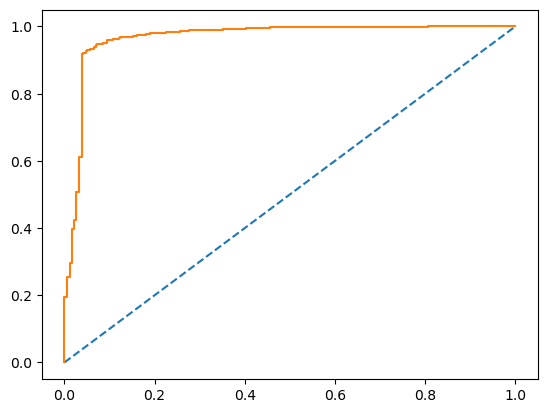

In [266]:
probs = SVM_model.predict_proba(X_scaled_train)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_scaled_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_scaled_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.967


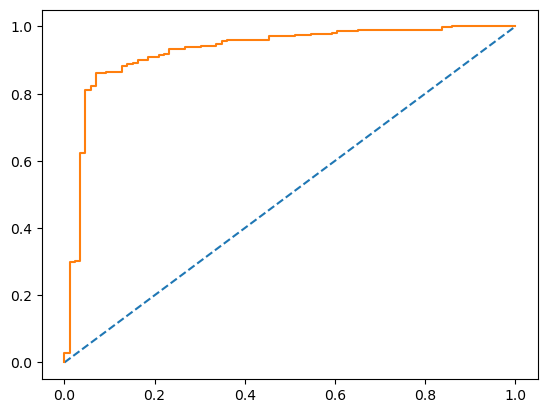

In [267]:
probs = SVM_model.predict_proba(X_scaled_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_scaled_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_scaled_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## 12) SVM with SMOTE

In [268]:
SVM_sm_model = SVC(probability=True, random_state=123)
SVM_sm_model.fit(X_scaled_train_res,y_scaled_train_res)

SVC(probability=True, random_state=123)

In [269]:
## Performance Matrix on train data set

y_train_predict = SVM_sm_model.predict(X_scaled_train_res)
model_score = SVM_sm_model.score(X_scaled_train_res, y_scaled_train_res)
print(model_score)
print(metrics.confusion_matrix(y_scaled_train_res, y_train_predict))
print(metrics.classification_report(y_scaled_train_res, y_train_predict))

0.9756317689530686
[[1618   44]
 [  37 1625]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1662
           1       0.97      0.98      0.98      1662

    accuracy                           0.98      3324
   macro avg       0.98      0.98      0.98      3324
weighted avg       0.98      0.98      0.98      3324



In [270]:
## Performance Matrix on test data set

y_test_predict = SVM_sm_model.predict(X_scaled_test)
model_score = SVM_sm_model.score(X_scaled_test, y_scaled_test)
print(model_score)
print(metrics.confusion_matrix(y_scaled_test, y_test_predict))
print(metrics.classification_report(y_scaled_test, y_test_predict))

0.8949494949494949
[[ 55  31]
 [ 21 388]]
              precision    recall  f1-score   support

           0       0.72      0.64      0.68        86
           1       0.93      0.95      0.94       409

    accuracy                           0.89       495
   macro avg       0.82      0.79      0.81       495
weighted avg       0.89      0.89      0.89       495



### AUC and ROC for the train data

AUC: 0.997


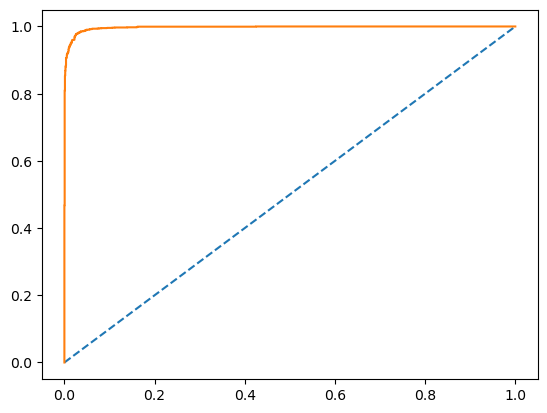

In [271]:
probs = SVM_sm_model.predict_proba(X_scaled_train_res)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_scaled_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_scaled_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.997


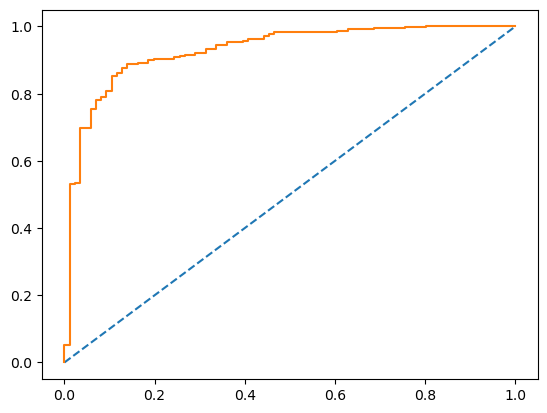

In [272]:
probs = SVM_sm_model.predict_proba(X_scaled_test)
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_scaled_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_scaled_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Best performing model - Random Forest with SMOTE

### New Dataframe as per the problem statement

In [273]:
new_df = pd.DataFrame()

In [274]:
data = [['England', 'Yes', 'Test', 'Day', 'Rainy'],
        ['Australia', 'No', 'T20', 'Day and Night', 'Winter'],
        ['Australia', 'No', 'T20', 'Day and Night', 'Winter'], 
        ['Srilanka', 'No', 'ODI', 'Day and Night', 'Winter'],
        ['Srilanka', 'No', 'ODI', 'Day and Night', 'Winter']]

In [275]:
new_df = pd.DataFrame(data, columns=['Opponent', 'Offshore', 'Match_format', 'Match_light_type', 'Season'])

In [276]:
new_df.head()

,Opponent,Offshore,Match_format,Match_light_type,Season
0,England,Yes,Test,Day,Rainy
1,Australia,No,T20,Day and Night,Winter
2,Australia,No,T20,Day and Night,Winter
3,Srilanka,No,ODI,Day and Night,Winter
4,Srilanka,No,ODI,Day and Night,Winter


In [277]:
new_df['Opponent'] = pd.Categorical(new_df.Opponent)
new_df['Offshore'] = pd.Categorical(new_df.Offshore)
new_df['Match_format'] = pd.Categorical(new_df.Match_format)
new_df['Match_light_type'] = pd.Categorical(new_df.Match_light_type)
new_df['Season'] = pd.Categorical(new_df.Season)

In [278]:
new_df_enc = new_df.copy()

In [279]:
new_df_enc = pd.get_dummies(new_df_enc, drop_first = True)

In [280]:
new_df_enc.head()

,Opponent_England,Opponent_Srilanka,Offshore_Yes,Match_format_T20,Match_format_Test,Match_light_type_Day and Night,Season_Winter
0,1,0,1,0,1,0,0
1,0,0,0,1,0,1,1
2,0,0,0,1,0,1,1
3,0,1,0,0,0,1,1
4,0,1,0,0,0,1,1


In [281]:
X_test.iloc[0]

Audience_number            39235.0
Extra_bowls_bowled            20.0
Max_run_given_1over           20.0
extra_bowls_opponent           7.0
player_highest_run            54.0
                            ...   
Players_scored_zero_4          0.0
player_highest_wicket_2        1.0
player_highest_wicket_3        0.0
player_highest_wicket_4        0.0
player_highest_wicket_5        0.0
Name: 1581, Length: 61, dtype: float64

In [282]:
X_test.columns

Index(['Audience_number', 'Extra_bowls_bowled', 'Max_run_given_1over',
       'extra_bowls_opponent', 'player_highest_run',
       'Match_light_type_Day and Night', 'Match_light_type_Night',
       'Match_format_T20', 'Match_format_Test', 'Bowlers_in_team_2.0',
       'Bowlers_in_team_3.0', 'Bowlers_in_team_4.0', 'Bowlers_in_team_5.0',
       'All_rounder_in_team_2.0', 'All_rounder_in_team_3.0',
       'All_rounder_in_team_4.0', 'First_selection_Bowling',
       'Opponent_Bangladesh', 'Opponent_England', 'Opponent_Kenya',
       'Opponent_Pakistan', 'Opponent_South Africa', 'Opponent_Srilanka',
       'Opponent_West Indies', 'Opponent_Zimbabwe', 'Season_Summer',
       'Season_Winter', 'Offshore_Yes', 'Max_run_scored_1over_12.0',
       'Max_run_scored_1over_13.0', 'Max_run_scored_1over_14.0',
       'Max_run_scored_1over_15.0', 'Max_run_scored_1over_16.0',
       'Max_run_scored_1over_17.0', 'Max_run_scored_1over_18.0',
       'Max_run_scored_1over_19.0', 'Max_run_scored_1over_20.0',


In [283]:
X_test.shape

(495, 61)

In [284]:
# Re-running random forest with smote model

param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9],
    'criterion' :['gini', 'entropy']
}

In [285]:
RFE_grid_smote = RandomForestClassifier(random_state=123)

In [286]:
grid_search = GridSearchCV(estimator=RFE_grid_smote, param_grid=param, cv= 5)

In [287]:
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [288]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 500} 

RandomForestClassifier(max_depth=9, n_estimators=500, random_state=123)


In [289]:
best_model = grid_search.best_estimator_

In [290]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train_res)
ytest_predict = best_model.predict(X_test)

In [291]:
best_model

RandomForestClassifier(max_depth=9, n_estimators=500, random_state=123)

In [292]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.133617,0.866383
1,0.171322,0.828678
2,0.646811,0.353189
3,0.437380,0.562620
4,0.559478,0.440522


In [293]:
# train data
print(metrics.confusion_matrix(y_train_res, ytrain_predict))
print(metrics.classification_report(y_train_res, ytrain_predict))

[[1637   25]
 [  14 1648]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1662
           1       0.99      0.99      0.99      1662

    accuracy                           0.99      3324
   macro avg       0.99      0.99      0.99      3324
weighted avg       0.99      0.99      0.99      3324



In [294]:
# test data
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

[[ 57  29]
 [  9 400]]
              precision    recall  f1-score   support

           0       0.86      0.66      0.75        86
           1       0.93      0.98      0.95       409

    accuracy                           0.92       495
   macro avg       0.90      0.82      0.85       495
weighted avg       0.92      0.92      0.92       495



In [295]:
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train_res.columns))

                              Imp
Audience_number          0.082250
Extra_bowls_bowled       0.069382
Max_run_given_1over      0.024607
extra_bowls_opponent     0.049866
player_highest_run       0.038937
...                           ...
Players_scored_zero_4    0.023025
player_highest_wicket_2  0.019004
player_highest_wicket_3  0.003301
player_highest_wicket_4  0.003885
player_highest_wicket_5  0.001931

[61 rows x 1 columns]


In [296]:
feature_imp = pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train_res.columns)

In [297]:
feature_imp.sort_values(by='Imp', ascending=False).head(10)

,Imp
Audience_number,0.082250
Extra_bowls_bowled,0.069382
Players_scored_zero_3,0.058466
extra_bowls_opponent,0.049866
Season_Winter,0.046919
All_rounder_in_team_4.0,0.045250
Min_run_scored_1over_3.0,0.044209
player_highest_run,0.038937
Min_run_given_1over_3,0.037622
All_rounder_in_team_3.0,0.036151


In [298]:
best_model.predict([X_test.iloc[5]])

array([1], dtype=int8)

In [299]:
best_model.predict([X_test.iloc[4]])

array([0], dtype=int8)

In [300]:
X_test.iloc[0]

Audience_number            39235.0
Extra_bowls_bowled            20.0
Max_run_given_1over           20.0
extra_bowls_opponent           7.0
player_highest_run            54.0
                            ...   
Players_scored_zero_4          0.0
player_highest_wicket_2        1.0
player_highest_wicket_3        0.0
player_highest_wicket_4        0.0
player_highest_wicket_5        0.0
Name: 1581, Length: 61, dtype: float64

In [301]:
X_test

,Audience_number,Extra_bowls_bowled,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Match_light_type_Day and Night,Match_light_type_Night,Match_format_T20,Match_format_Test,Bowlers_in_team_2.0,...,Min_run_scored_1over_2.0,Min_run_scored_1over_3.0,Min_run_scored_1over_4.0,Players_scored_zero_2,Players_scored_zero_3,Players_scored_zero_4,player_highest_wicket_2,player_highest_wicket_3,player_highest_wicket_4,player_highest_wicket_5
1581,39235.0,20.0,20.0,7,54.0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
1224,8918.0,1.0,6.0,0,64.0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
85,19971.0,1.0,6.0,0,48.0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1458,15883.0,3.0,6.0,2,68.0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
553,17073.0,1.0,6.0,0,73.0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,99925.0,33.0,12.0,9,72.0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
903,31871.0,20.0,20.0,7,80.0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
1098,16632.0,2.0,6.0,2,47.0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2253,27552.0,8.0,8.0,4,71.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Adding the new dataframe to the x_test in order to predict 

In [302]:
X_test_n = pd.concat([X_test, new_df_enc], axis = 0)
X_test_n.reset_index(drop=True, inplace=True)

In [303]:
X_test_n.tail()

,Audience_number,Extra_bowls_bowled,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Match_light_type_Day and Night,Match_light_type_Night,Match_format_T20,Match_format_Test,Bowlers_in_team_2.0,...,Min_run_scored_1over_2.0,Min_run_scored_1over_3.0,Min_run_scored_1over_4.0,Players_scored_zero_2,Players_scored_zero_3,Players_scored_zero_4,player_highest_wicket_2,player_highest_wicket_3,player_highest_wicket_4,player_highest_wicket_5
495,NaN,NaN,NaN,NaN,NaN,0,NaN,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,NaN,NaN,NaN,NaN,NaN,1,NaN,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,NaN,NaN,NaN,NaN,NaN,1,NaN,1,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,NaN,NaN,NaN,NaN,NaN,1,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,NaN,NaN,NaN,NaN,NaN,1,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
# Replacing Nan values with 0
X_test_n.fillna(value = 0, inplace = True)

In [305]:
X_test_n.tail(10)

,Audience_number,Extra_bowls_bowled,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Match_light_type_Day and Night,Match_light_type_Night,Match_format_T20,Match_format_Test,Bowlers_in_team_2.0,...,Min_run_scored_1over_2.0,Min_run_scored_1over_3.0,Min_run_scored_1over_4.0,Players_scored_zero_2,Players_scored_zero_3,Players_scored_zero_4,player_highest_wicket_2,player_highest_wicket_3,player_highest_wicket_4,player_highest_wicket_5
490,99925.0,33.0,12.0,9.0,72.0,0,0.0,0,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
491,31871.0,20.0,20.0,7.0,80.0,0,0.0,0,0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
492,16632.0,2.0,6.0,2.0,47.0,1,0.0,0,0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
493,27552.0,8.0,8.0,4.0,71.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
494,72142.0,15.0,13.0,12.0,55.0,0,0.0,1,0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
495,0.0,0.0,0.0,0.0,0.0,0,0.0,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,1,0.0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,1,0.0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,0.0,0.0,0.0,0.0,0.0,1,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [306]:
X_test_n[X_test_n.isna().any(axis=1)] 

,Audience_number,Extra_bowls_bowled,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Match_light_type_Day and Night,Match_light_type_Night,Match_format_T20,Match_format_Test,Bowlers_in_team_2.0,...,Min_run_scored_1over_2.0,Min_run_scored_1over_3.0,Min_run_scored_1over_4.0,Players_scored_zero_2,Players_scored_zero_3,Players_scored_zero_4,player_highest_wicket_2,player_highest_wicket_3,player_highest_wicket_4,player_highest_wicket_5


### 1) Predicting 1st match as per the problem statement

In [307]:
best_model.predict([X_test_n.iloc[495]])

array([0], dtype=int8)

### 2) Predicting 2nd match as per the problem statement

In [308]:
NB_model.predict([X_test_n.iloc[496]])

array([1], dtype=int8)

### 3) Predicting 3rd match as per the problem statement

In [309]:
NB_model.predict([X_test_n.iloc[497]])

array([1], dtype=int8)

### 4) Predicting 4th match as per the problem statement

In [310]:
NB_model.predict([X_test_n.iloc[498]])

array([1], dtype=int8)

### 5) Predicting 5th match as per the problem statement

In [311]:
NB_model.predict([X_test_n.iloc[499]])

array([1], dtype=int8)

# THE END